In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t,kurtosis,skew
import statistics as st
import math as m

import warnings
warnings.filterwarnings('ignore')

# SPRINT 1: DATA PREPROCESSING

In [3]:
players_df = pd.read_excel('players.xlsx')
players_df

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,273570,Desevio Payne,2020,1283,desevio-payne,United States,1995-11-30,Right-Back,Defender,right,182.0,NaN,400000.0,NaT,NaN
148,111783,Alejandro Bedoya,2015,995,alejandro-bedoya,United States,1987-04-29,Central Midfield,Midfield,right,182.0,300000.0,2500000.0,2023-12-31,YMU Group
149,160670,Joe Gyau,2014,16,joe-gyau,United States,1992-09-16,Left Winger,Attack,both,175.0,400000.0,600000.0,2023-12-31,BR Group Management
150,3476,Brad Friedel,2014,148,brad-friedel,United States,1971-05-18,Goalkeeper,Goalkeeper,NaN,NaN,NaN,4000000.0,NaT,NaN


In [4]:
game_lineup_df = pd.read_excel('game_lineups.xlsx')
game_lineup_df

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back
...,...,...,...,...,...,...,...,...
214,ec3d266094f99ca0a8847de827e37105,4194152,starting_lineup,7,504215,Giovanni Reyna,0,Right Winger
215,667840cda9bdf3b0344b8e99b306cf38,4194152,starting_lineup,23,124732,John Anthony Brooks,0,Centre-Back
216,1c5d2f60ee777760f8a757aa10c42bb1,4194154,starting_lineup,13,103064,Terrence Boyd,0,Centre-Forward
217,99032084fd00ffbfee52c541a9f960ab,4204000,substitutes,14,315762,Luca de la Torre,0,Central Midfield


In [5]:
appearences_df = pd.read_excel('appearances.xlsx')
appearences_df

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
3563,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,77
3564,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,84
3565,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,90
3566,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,6


In [6]:
appearences_df['red_cards'].unique()

array([0, 1], dtype=int64)

In [7]:
game_events_df = pd.read_excel('game_events.xlsx')
game_events_df

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0
...,...,...,...,...,...,...,...,...,...
1844,4acebccbc824e45d51045d8c5e164341,2023-10-31,4194147,3,Goals,355369,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,284010.0
1845,159ad5633cf9d7c3a97b593efb6c3269,2023-10-31,4194147,9,Goals,355369,", Right-footed shot, 2. Tournament Goal Assist...",NaN,629588.0
1846,daa31f19aab26eec375884aef73c73b3,2023-10-31,4194147,65,Substitutions,355369,", Tactical",544148.0,NaN
1847,869a13060604e769290dafe0b1f14483,2023-11-01,4194152,70,Substitutions,504215,", Tactical",406640.0,NaN


In [8]:
games_df = pd.read_excel('games.xlsx')
games_df

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,3296153,NLP,2019,Round of 16,2020-01-22,7,0,NaN,NaN,Erik ten Hag,Eric Meijers,Johan Cruijff ArenA,52017.0,Richard Martens,NaN,NaN,AFC Ajax Amsterdam,NaN,07:00:00,domestic_cup
3264,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,Thomas Thomasberg,Right to Dream Park,2843.0,Michael Tykgaard,NaN,NaN,Football Club Nords,Hobro IK,03:02:00,domestic_league
3265,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,Marc Brys,Guldensporenstadion,6143.0,Wesley Alen,NaN,NaN,Koninklijke Voetbalclub Kortrijk,Koninklijke Sint-Truidense Voetbalvereniging,03:01:00,domestic_league
3266,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,Mark Hughes,Wembley Stadium,62202.0,Roger East,NaN,NaN,Tottenham Hotspur Football Club,Stoke City,05:01:00,domestic_league


# INTERPRETATION:

I have read all the datasets for the necessary tasks.

In [10]:
merged_df_1 = appearences_df.merge(games_df, on='game_id', how='inner')
merged_df_1

,appearance_id,game_id,player_id,date_x,player_name,competition_id_x,yellow_cards,red_cards,goals,assists,...,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,...,Kent Nielsen,Ceres Park,9728.0,Michael Svendsen,NaN,NaN,Aarhus Gymnastik Forening,Aalborg BK,01:01:00,domestic_league
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,Colin Todd,Sydbank Park,2995.0,Claus Bo Larsen,NaN,NaN,Sonderjyske Fc,Randers Fodbold Club,06:01:00,domestic_league
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,...,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,Temur Shalamberidze,Ceres Park,9000.0,Boako Jovanetic,NaN,NaN,Aarhus Gymnastik Forening,NaN,01:02:00,international_cup
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,...,Peter Maes,Constant Vanden Stock Stadion,14485.0,Laurent Colemonts,NaN,NaN,Royal Sporting Club Anderlecht,KSC Lokeren (- 2020),03:02:00,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,Nicky Hayen,Olympisch Stadion,3200.0,Wesli De Cremer,NaN,NaN,Beerschot V.A.,SK Beveren,03:02:00,domestic_league
3564,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,...,Kevin Muscat,AFAS Stadion,5185.0,Nathan Verboomen,NaN,NaN,Yellow-Red Koninklijke Voetbalclub Mechelen,Koninklijke Sint-Truidense Voetbalvereniging,02:00:00,domestic_league
3565,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,...,Sergio Conceicao,Estádio do Bessa,NaN,Luís Godinho,NaN,NaN,Boavista Futebol Clube,Futebol Clube do Porto,00:05:00,domestic_league
3566,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,...,Thomas Letsch,Johan Cruijff ArenA,15000.0,Pol van Boekel,NaN,NaN,AFC Ajax Amsterdam,Stichting Betaald Voetbal Vitesse Arnhem,02:01:00,domestic_league


## INTERPRETATION:

I HAVE MEREGED THE APPEARENCE_DF WITH GAMES_DF BASED ON GAME_ID COLUMN.

In [12]:
merged_df_2 = merged_df_1.merge(game_events_df, on=['game_id','player_id'] , how='inner')
merged_df_2

,appearance_id,game_id,player_id,date_x,player_name,competition_id_x,yellow_cards,red_cards,goals,assists,...,away_club_name,aggregate,competition_type,game_event_id,date,minute,type,description,player_in_id,player_assist_id
0,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,Randers Fodbold Club,06:01:00,domestic_league,d9f02a9d767f319e58909ba1e1de6d23,2012-07-14,50,Goals,", Long distance kick, 1. Goal of the Season As...",NaN,NaN
1,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,NaN,01:02:00,international_cup,2ab0ea7af8313c0da07c723728bb6a49,2012-07-19,74,Substitutions,", Not reported",174001.0,NaN
2,2224560_39467,2224560,39467,2012-07-22,Clarence Goodson,DK1,1,0,0,0,...,BRA NDBYERNES,02:01:00,domestic_league,e7631c64f9a922d4370ba6db39ccbfac,2012-07-22,60,Cards,"1. Yellow card , Foul",NaN,NaN
3,2224569_161244,2224569,161244,2012-07-22,Conor O'Brien,DK1,1,0,0,1,...,Football Club Ka Benhavn,01:01:00,domestic_league,abe3da42c64790a4c4ae00ff82c3024f,2012-07-22,68,Cards,"1. Yellow card , Foul",NaN,NaN
4,2224568_119169,2224568,119169,2012-07-23,Aron Johannsson,DK1,0,0,0,0,...,Esbjerg fB,00:00:00,domestic_league,1b4e309dd87c3a8f86e0675b9b29d36c,2012-07-23,73,Substitutions,", Tactical",24282.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,Heracles Almelo,04:00:00,domestic_league,027c17a496d567bce24280628ee1bce2,2020-09-20,58,Substitutions,NaN,446247.0,NaN
1118,3412906_393325,3412906,393325,2020-09-26,Josh Sargent,L1,0,0,0,1,...,Sportverein Werder Bremen von 1899,01:03:00,domestic_league,e22f77951e979538ff2e0c1fa1fd0611,2020-09-26,87,Substitutions,NaN,344830.0,NaN
1119,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,SK Beveren,03:02:00,domestic_league,3e0892bd11f50a5259b22e5c43755ada,2020-09-26,11,Goals,", Right-footed shot, 2. Goal of the Season",NaN,NaN
1120,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,SK Beveren,03:02:00,domestic_league,2c1bc4101fb8b426e84b9b5d55eb5783,2020-09-26,77,Substitutions,NaN,358907.0,NaN


## INTERPRETATION:

I HAVE MEREGED THE game_events_df WITH MEREGD_DF_1 BASED ON GAME_ID AND PLAYER_ID COLUMNS BECAUSE IF I USE ONLY GAME_ID IT SHOWS 0 COLUMNS SO I USED PLAYER_ID.

In [14]:
merged_df_2.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'competition_id_y', 'season', 'round', 'date_y',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'game_event_id',
       'date', 'minute', 'type', 'description', 'player_in_id',
       'player_assist_id'],
      dtype='object')

In [15]:
merged_df_2 = merged_df_2.drop(columns=['competition_id_y', 'date_x', 'date_y'], axis=1)
merged_df_2

,appearance_id,game_id,player_id,player_name,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,away_club_name,aggregate,competition_type,game_event_id,date,minute,type,description,player_in_id,player_assist_id
0,2224732_161244,2224732,161244,Conor O'Brien,DK1,0,0,1,0,90,...,Randers Fodbold Club,06:01:00,domestic_league,d9f02a9d767f319e58909ba1e1de6d23,2012-07-14,50,Goals,", Long distance kick, 1. Goal of the Season As...",NaN,NaN
1,2232104_119169,2232104,119169,Aron Johannsson,ELQ,0,0,0,0,74,...,NaN,01:02:00,international_cup,2ab0ea7af8313c0da07c723728bb6a49,2012-07-19,74,Substitutions,", Not reported",174001.0,NaN
2,2224560_39467,2224560,39467,Clarence Goodson,DK1,1,0,0,0,90,...,BRA NDBYERNES,02:01:00,domestic_league,e7631c64f9a922d4370ba6db39ccbfac,2012-07-22,60,Cards,"1. Yellow card , Foul",NaN,NaN
3,2224569_161244,2224569,161244,Conor O'Brien,DK1,1,0,0,1,90,...,Football Club Ka Benhavn,01:01:00,domestic_league,abe3da42c64790a4c4ae00ff82c3024f,2012-07-22,68,Cards,"1. Yellow card , Foul",NaN,NaN
4,2224568_119169,2224568,119169,Aron Johannsson,DK1,0,0,0,0,73,...,Esbjerg fB,00:00:00,domestic_league,1b4e309dd87c3a8f86e0675b9b29d36c,2012-07-23,73,Substitutions,", Tactical",24282.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,3450613_315762,3450613,315762,Luca de la Torre,NL1,0,0,0,0,58,...,Heracles Almelo,04:00:00,domestic_league,027c17a496d567bce24280628ee1bce2,2020-09-20,58,Substitutions,NaN,446247.0,NaN
1118,3412906_393325,3412906,393325,Josh Sargent,L1,0,0,0,1,87,...,Sportverein Werder Bremen von 1899,01:03:00,domestic_league,e22f77951e979538ff2e0c1fa1fd0611,2020-09-26,87,Substitutions,NaN,344830.0,NaN
1119,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,SK Beveren,03:02:00,domestic_league,3e0892bd11f50a5259b22e5c43755ada,2020-09-26,11,Goals,", Right-footed shot, 2. Goal of the Season",NaN,NaN
1120,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,SK Beveren,03:02:00,domestic_league,2c1bc4101fb8b426e84b9b5d55eb5783,2020-09-26,77,Substitutions,NaN,358907.0,NaN


## INTERPRETATION:

I HAVE DROPPED THE 'competition_id_y', 'date_x', 'date_y' COLUMNS BECAUSE IT HAS REPEATED VALUES SO I DROPPED IT.

In [17]:
merged_df_3 = merged_df_2.merge(game_lineup_df, on=['player_id'], how='inner')
merged_df_3

,appearance_id,game_id_x,player_id,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,description,player_in_id,player_assist_id,game_lineups_id,game_id_y,type_y,number,player_name_y,team_captain,position
0,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,", Not reported",60957.0,NaN,8d717b1017e72d89d2ee1112bb2d7466,4096025,substitutes,22,Timothy Chandler,0,Right-Back
1,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,", Not reported",60957.0,NaN,d53eb3fd74523d6dd4536653c145ae96,4096042,substitutes,22,Timothy Chandler,0,Right-Back
2,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,", Not reported",60957.0,NaN,3efc21c645e46b2f411bcdb1710aa444,4096061,substitutes,22,Timothy Chandler,0,Right-Back
3,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,", Not reported",60957.0,NaN,cc79e78c570ce19872dfed125d324407,4162615,substitutes,22,Timothy Chandler,0,Right-Back
4,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,", Not reported",60957.0,NaN,21de58902f547e231bf2604be9fa996f,4162639,substitutes,22,Timothy Chandler,0,Right-Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,NaN,358907.0,NaN,26085977dac1dc934abb39888f128636,4120867,substitutes,11,Joseph Efford,0,Centre-Forward
3633,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,NaN,358907.0,NaN,eadce2f0ce9f400d0561a8c05453d702,4150507,substitutes,28,Joseph Efford,0,Centre-Forward
3634,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,NaN,358907.0,NaN,bc79183aa9a1ffacb14cc733f6143411,4150562,substitutes,28,Joseph Efford,0,Centre-Forward
3635,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,NaN,358907.0,NaN,e16817800f83daf7bad1ddabf58316b7,4150625,substitutes,28,Joseph Efford,0,Centre-Forward


## INTERPRETATION:

I HAVE MEREGED THE game_lineup_df WITH merged_df_2 BASED ON PLAYER_ID COLUMN.

In [19]:
merged_df_3 = merged_df_3.drop(columns='player_name_y', axis=1)
merged_df_3

,appearance_id,game_id_x,player_id,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,type_x,description,player_in_id,player_assist_id,game_lineups_id,game_id_y,type_y,number,team_captain,position
0,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Substitutions,", Not reported",60957.0,NaN,8d717b1017e72d89d2ee1112bb2d7466,4096025,substitutes,22,0,Right-Back
1,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Substitutions,", Not reported",60957.0,NaN,d53eb3fd74523d6dd4536653c145ae96,4096042,substitutes,22,0,Right-Back
2,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Substitutions,", Not reported",60957.0,NaN,3efc21c645e46b2f411bcdb1710aa444,4096061,substitutes,22,0,Right-Back
3,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Substitutions,", Not reported",60957.0,NaN,cc79e78c570ce19872dfed125d324407,4162615,substitutes,22,0,Right-Back
4,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Substitutions,", Not reported",60957.0,NaN,21de58902f547e231bf2604be9fa996f,4162639,substitutes,22,0,Right-Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,Substitutions,NaN,358907.0,NaN,26085977dac1dc934abb39888f128636,4120867,substitutes,11,0,Centre-Forward
3633,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,Substitutions,NaN,358907.0,NaN,eadce2f0ce9f400d0561a8c05453d702,4150507,substitutes,28,0,Centre-Forward
3634,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,Substitutions,NaN,358907.0,NaN,bc79183aa9a1ffacb14cc733f6143411,4150562,substitutes,28,0,Centre-Forward
3635,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,Substitutions,NaN,358907.0,NaN,e16817800f83daf7bad1ddabf58316b7,4150625,substitutes,28,0,Centre-Forward


## INTERPRETATION:

I HAVE DROPPED THE 'player_name_y' COLUMNS BECAUSE IT HAS REPEATED VALUES SO I DROPPED IT.

In [21]:
merged_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   appearance_id           3637 non-null   object        
 1   game_id_x               3637 non-null   int64         
 2   player_id               3637 non-null   int64         
 3   player_name_x           3637 non-null   object        
 4   competition_id_x        3637 non-null   object        
 5   yellow_cards            3637 non-null   int64         
 6   red_cards               3637 non-null   int64         
 7   goals                   3637 non-null   int64         
 8   assists                 3637 non-null   int64         
 9   minutes_played          3637 non-null   int64         
 10  season                  3637 non-null   int64         
 11  round                   3637 non-null   object        
 12  home_club_goals         3637 non-null   int64   

In [22]:
merged_df_4 = merged_df_3.merge(players_df, on=['player_id'], how='inner')
merged_df_4

,appearance_id,game_id_x,player_id,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
1,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
2,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
3,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
4,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


## INTERPRETATION:

I HAVE MEREGED THE players_df WITH merged_df_3 BASED ON player_id COLUMN.

In [24]:
merged_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                3637 non-null   object        
 1   game_id_x                    3637 non-null   int64         
 2   player_id                    3637 non-null   int64         
 3   player_name_x                3637 non-null   object        
 4   competition_id_x             3637 non-null   object        
 5   yellow_cards                 3637 non-null   int64         
 6   red_cards                    3637 non-null   int64         
 7   goals                        3637 non-null   int64         
 8   assists                      3637 non-null   int64         
 9   minutes_played               3637 non-null   int64         
 10  season                       3637 non-null   int64         
 11  round                        3637 non-null 

In [25]:
merged_df_4 = merged_df_4.drop(columns=['player_name_x'], axis=1)
merged_df_4

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


## INTERPRETATION:

I HAVE DROPPED THE 'player_name_x' COLUMNS BECAUSE IT HAS REPEATED VALUES SO I DROPPED IT.

In [27]:
merged_df_4.isnull().sum()

appearance_id                     0
game_id_x                         0
player_id                         0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
season                            0
round                             0
home_club_goals                   0
away_club_goals                   0
home_club_position              677
away_club_position              677
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                      324
referee                          22
home_club_formation            3637
away_club_formation            3637
home_club_name                  198
away_club_name                   22
aggregate                         0
competition_type                  0
game_event_id                     0
date                        

In [28]:
merged_df_4 = merged_df_4.drop(columns=['home_club_formation','away_club_formation','player_assist_id'], axis=1)
merged_df_4

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


## INTERPRETATION:

I HAVE DROPPED THE 'home_club_formation','away_club_formation','player_assist_id' COLUMNS BECAUSE IT HAS REPEATED VALUES SO I DROPPED IT.

In [30]:
num_col = merged_df_4.select_dtypes(include='number')
num_col

,game_id_x,player_id,yellow_cards,red_cards,goals,assists,minutes_played,season,home_club_goals,away_club_goals,...,minute,player_in_id,game_id_y,number,team_captain,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
0,2231426,49723,0,0,0,0,70,2012,1,2,...,70,60957.0,4096025,22,0,2023,24,186.0,700000.0,5000000.0
1,2231426,49723,0,0,0,0,70,2012,1,2,...,70,60957.0,4096042,22,0,2023,24,186.0,700000.0,5000000.0
2,2231426,49723,0,0,0,0,70,2012,1,2,...,70,60957.0,4096061,22,0,2023,24,186.0,700000.0,5000000.0
3,2231426,49723,0,0,0,0,70,2012,1,2,...,70,60957.0,4162615,22,0,2023,24,186.0,700000.0,5000000.0
4,2231426,49723,0,0,0,0,70,2012,1,2,...,70,60957.0,4162639,22,0,2023,24,186.0,700000.0,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291,537467,0,0,1,0,77,2020,3,2,...,77,358907.0,4120867,11,0,2023,2671,176.0,300000.0,600000.0
3633,3415291,537467,0,0,1,0,77,2020,3,2,...,77,358907.0,4150507,28,0,2023,2671,176.0,300000.0,600000.0
3634,3415291,537467,0,0,1,0,77,2020,3,2,...,77,358907.0,4150562,28,0,2023,2671,176.0,300000.0,600000.0
3635,3415291,537467,0,0,1,0,77,2020,3,2,...,77,358907.0,4150625,28,0,2023,2671,176.0,300000.0,600000.0


In [31]:
cat_col = merged_df_4.select_dtypes(include=['object', 'datetime'])
cat_col

,appearance_id,competition_id_x,round,home_club_manager_name,away_club_manager_name,stadium,referee,home_club_name,away_club_name,aggregate,...,position_x,name,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,contract_expiration_date,agent_name
0,2231426_49723,L1,4. Matchday,Dieter Hecking,Armin Veh,Max-Morlock-Stadion,Felix Zwayer,1.FC Nuremberg,eintracht frankfurt Football ag,01:02:00,...,Right-Back,Timothy Chandler,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,2025-06-30,NaN
1,2231426_49723,L1,4. Matchday,Dieter Hecking,Armin Veh,Max-Morlock-Stadion,Felix Zwayer,1.FC Nuremberg,eintracht frankfurt Football ag,01:02:00,...,Right-Back,Timothy Chandler,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,2025-06-30,NaN
2,2231426_49723,L1,4. Matchday,Dieter Hecking,Armin Veh,Max-Morlock-Stadion,Felix Zwayer,1.FC Nuremberg,eintracht frankfurt Football ag,01:02:00,...,Right-Back,Timothy Chandler,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,2025-06-30,NaN
3,2231426_49723,L1,4. Matchday,Dieter Hecking,Armin Veh,Max-Morlock-Stadion,Felix Zwayer,1.FC Nuremberg,eintracht frankfurt Football ag,01:02:00,...,Right-Back,Timothy Chandler,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,2025-06-30,NaN
4,2231426_49723,L1,4. Matchday,Dieter Hecking,Armin Veh,Max-Morlock-Stadion,Felix Zwayer,1.FC Nuremberg,eintracht frankfurt Football ag,01:02:00,...,Right-Back,Timothy Chandler,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,2025-06-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,BE1,7. Matchday,Hernan Losada,Nicky Hayen,Olympisch Stadion,Wesli De Cremer,Beerschot V.A.,SK Beveren,03:02:00,...,Centre-Forward,Joseph Efford,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,2026-06-30,TOP Agency
3633,3415291_537467,BE1,7. Matchday,Hernan Losada,Nicky Hayen,Olympisch Stadion,Wesli De Cremer,Beerschot V.A.,SK Beveren,03:02:00,...,Centre-Forward,Joseph Efford,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,2026-06-30,TOP Agency
3634,3415291_537467,BE1,7. Matchday,Hernan Losada,Nicky Hayen,Olympisch Stadion,Wesli De Cremer,Beerschot V.A.,SK Beveren,03:02:00,...,Centre-Forward,Joseph Efford,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,2026-06-30,TOP Agency
3635,3415291_537467,BE1,7. Matchday,Hernan Losada,Nicky Hayen,Olympisch Stadion,Wesli De Cremer,Beerschot V.A.,SK Beveren,03:02:00,...,Centre-Forward,Joseph Efford,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,2026-06-30,TOP Agency


# INTERPRETATION:

I HAVE SEPERATED THE NUMERICAL AND CATEGORICAL COLUMNS USING SELECT_DTYPES FUNCTION.

In [33]:
for i in num_col.columns:
    merged_df_4[i] = merged_df_4[i].fillna(merged_df_4[i].mean())

In [34]:
for j in cat_col.columns:
    merged_df_4[j] = merged_df_4[j].fillna(merged_df_4[j].mode()[0])

In [35]:
merged_df = merged_df_4
merged_df

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


In [36]:
merged_df['contract_expiration_date'].unique()

<DatetimeArray>
['2025-06-30 00:00:00', '2024-06-30 00:00:00', '2027-06-30 00:00:00',
 '2028-06-30 00:00:00', '2026-06-30 00:00:00']
Length: 5, dtype: datetime64[ns]

# INTERPRETATION:

I HAVE FILLED THE NULL VALUES USING FILLNA FUNCTION FOR NUMERICAL COLUMN I HAVE USED MEAN() WHICH IS AVERAGE VALUE AND FOR CATEGORICAL COLUMNS I HAVE USED MODE() WHICH IS FREAQUENT VALUES IN THE COLUMN.

In [38]:
merged_df_4.isnull().sum()

appearance_id                  0
game_id_x                      0
player_id                      0
competition_id_x               0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
game_event_id                  0
date                           0
minute                         0
type_x                         0
description                    0
player_in_id                   0
game_lineu

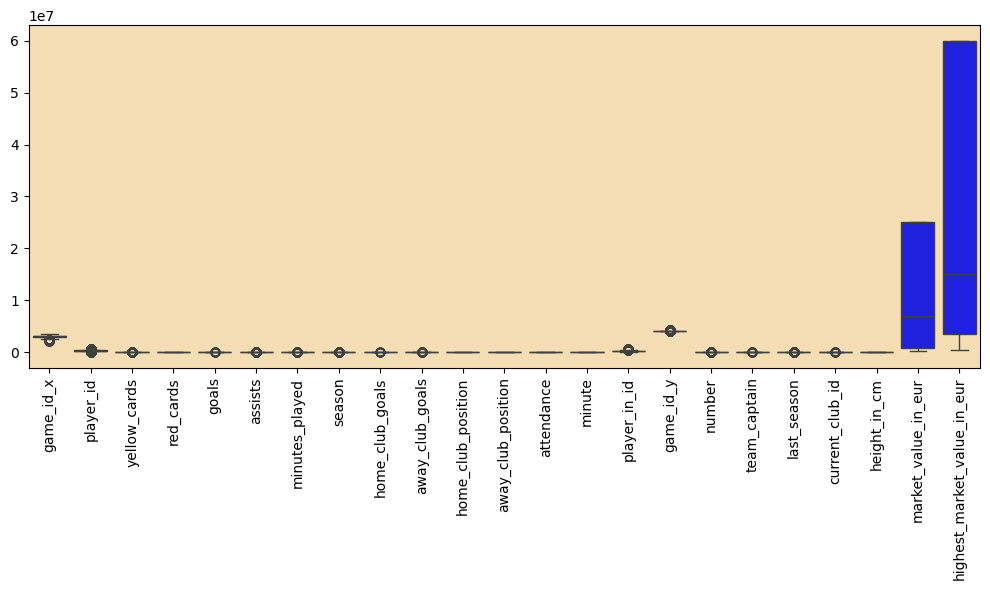

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df_4, color='blue')
plt.gca().set_facecolor('wheat')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## INTERPRETATION:

I HAVE FOUND THE OUTLIERS USING BOXPLOT CHART AND IT IS VISIBLE THAT THERE ARE SOME OUTLIERS IN SOME COLUMNS BUT I DIDN'T TREATED THE OUTLIERS BECAUSE IF I TREAT THE OUTLIERS IT AFFECTS THE VALUES IN THE OTHER COLUMNS.

In [678]:
### OUTLIERS TREATMENT:
def iqr_winsorization(df):
    df_c=df.copy()
    col_to_treat=['number','team_captain']
    for col in col_to_treat:
        Q1=df_c[col].quantile(0.25)
        Q2=df_c[col].quantile(0.50)
        Q3=df_c[col].quantile(0.75)
        IQR=Q3-Q1
        UF=Q3+1.5*IQR
        LF=Q1-1.5*IQR
        df_c.loc[df_c[col]>UF,col]=UF
        df_c.loc[df_c[col]<LF,col]=LF
    return df_c
df=pd.DataFrame(merged_df_4)
treated_df=iqr_winsorization(df.copy())

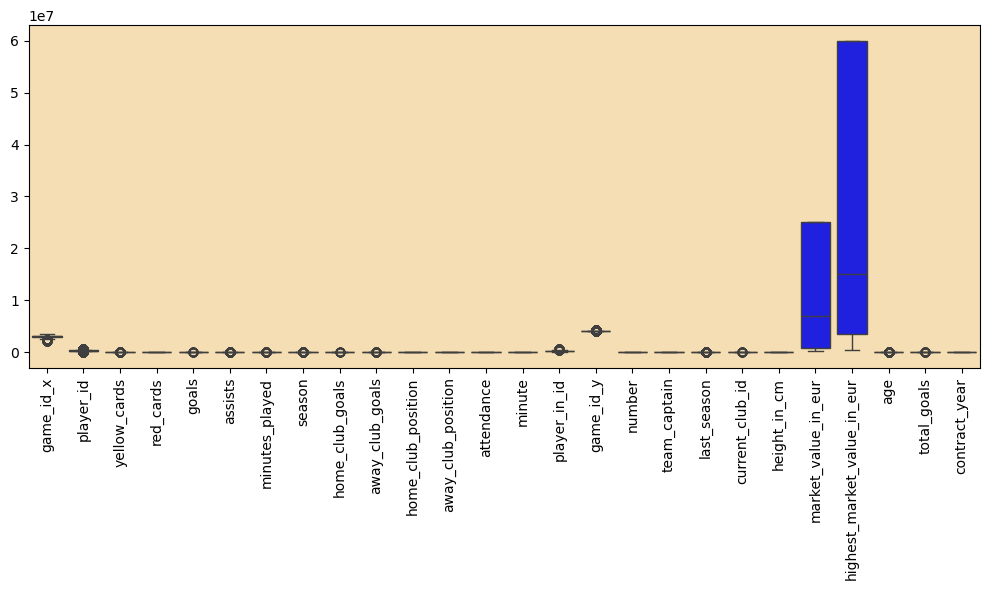

In [680]:
plt.figure(figsize=(10,6))
sns.boxplot(data=treated_df, color='blue')
plt.gca().set_facecolor('wheat')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [682]:
treated_df['yellow_cards'].unique()

array([0, 1], dtype=int64)

In [684]:
treated_df['red_cards'].unique()

array([0], dtype=int64)

In [41]:
#pip install mysql-connector-python

In [42]:
'''
!pip install ipykernal
!pip install pymysql
import pymysql as py'''

'\n!pip install ipykernal\n!pip install pymysql\nimport pymysql as py'

In [43]:
#db=py.connect(host="localhost",user="root",password="Sai66666",database="capstone_project_100")
#mycursor=db.cursor()

In [44]:
#mycursor.execute("select VERSION()")

In [45]:
#mycursor.fetchone()

In [46]:
#from sqlalchemy import create_engine

In [47]:
'''
hostname="localhost"
dbname="capstone_project_100"
uname="root"
pwd="Sai66666"
engine=create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname,db=dbname,user=uname,pw=pwd))
merged_df.to_sql("football_data_merged",engine,index=False)'''

'\nhostname="localhost"\ndbname="capstone_project_100"\nuname="root"\npwd="Sai66666"\nengine=create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname,db=dbname,user=uname,pw=pwd))\nmerged_df.to_sql("football_data_merged",engine,index=False)'

In [48]:
#game=pd.read_sql_query("select * from football_data_merged",engine)
#game

In [49]:
merged_df = merged_df_4
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'description',
       'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

# SPRINT : 3 - RELATIONSHIP ANALYSIS:

### 1.PERFORMANCE ANALYSIS:

###  1. List out the players who scored top goals in single season?

In [53]:
# 1.PERFOMMANCE ANALYSIS:

# TOP GOAL SCORES IN SINGLE SEASON:

# Have to filter by highest goal for Each Season

most_goals = merged_df.groupby(['player_id','season'])['goals'].sum().reset_index()
most_goals = most_goals.sort_values(by='goals', ascending=False).head()
most_goals

,player_id,season,goals
34,315779,2019,294
32,315779,2017,112
33,315779,2018,112
42,355369,2018,108
58,542776,2018,102


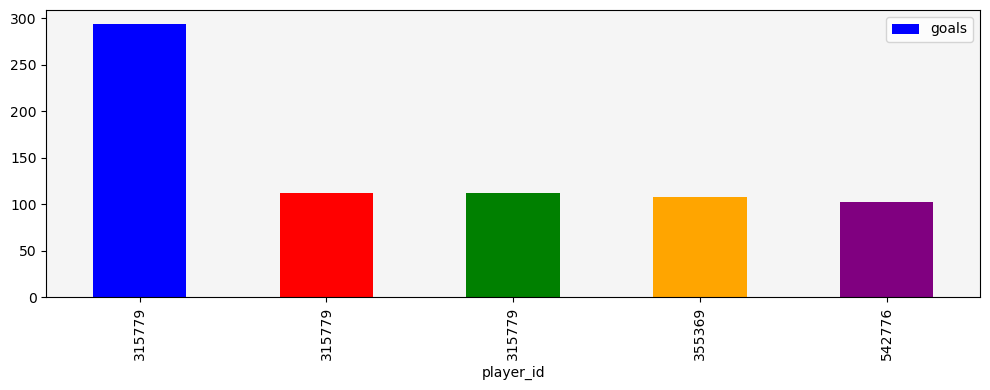

In [54]:
#VISUALIZE:
colors=['blue', 'red', 'green', 'orange', 'purple']
most_goals.plot(x='player_id', y='goals', kind = 'bar', color=colors)
plt.gca().set_facecolor('whitesmoke')
plt.gcf().set_size_inches(10,4)
plt.tight_layout()
plt.show()

## INTERPRETATION:

IN THIS I HAVE DONE THE DESCRIPTIVE ANALYSIS BASED ON PERFORMANCE SO FIRST I HAVE TOOK THE PLAYER_ID AND SEASON COLUMNS AND I GROUPED THEM AFTER THAT I HAVE CALCULATED THE TOTAL GOALS USING SUM() AND THEN I HAVE SORTED THEM IN DESCENDING ORDER AFTER THAT I VISUALIZED THE DATA AND I HAVE ASSIGNED SOME UNIQUE COLORS FOR EACH ID AND I AHVE PLOTTED USING BARPLOT IN MATPOTLIB LIBRARY.

### 2. What is the CORRELATION BETWEEN RED AND YELOW CARDS AND MINUTES PLAYED:

In [57]:
# CORRELATION BETWEEN RED AND YELOW CARDS AND MINUTES PLAYED:

correlation_yellow = merged_df['minutes_played'].corr(merged_df['yellow_cards'])
correlation_red = merged_df['minutes_played'].corr(merged_df['red_cards'])

print(correlation_yellow)
print(correlation_red)

0.0884527535900134
nan


In [58]:
correlation_data = pd.DataFrame({'yellow_cards':[correlation_yellow],'red_cards':[correlation_red]})
correlation_data                                 

,yellow_cards,red_cards
0,0.088453,NaN


## INTERPREATATION:

I HAVE FOUND THE CORRELATION BETWEEN THE MINUES PLAYED AND YELLOW/RED CARDS SO IT IS DONE USING CORR() FUNCTION FOR YELLOW CARD IT IS 0.088 AND THERE ARE NO RED CARDS SO IT IS 0

In [60]:
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'description',
       'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

# SPRINT 3 (i)-DESCRIPTIVE ANALYSIS (PLAYER PERFORMANCE ANALYSIS):

In [62]:
# DESCRIPTIVE ANALYSIS:

players_perfomance = merged_df[['yellow_cards', 'red_cards', 'goals', 'minutes_played', 'attendance', 'height_in_cm', 'home_club_goals', 'away_club_goals']]
players_perfomance.describe()

,yellow_cards,red_cards,goals,minutes_played,attendance,height_in_cm,home_club_goals,away_club_goals
count,3637.000000,3637.0,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000
mean,0.154523,0.0,0.482541,70.009348,32421.794748,181.648611,1.930162,1.586472
std,0.361499,0.0,0.612516,20.993278,24342.138866,6.400180,1.560678,1.523925
min,0.000000,0.0,0.000000,6.000000,300.000000,171.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,60.000000,10232.000000,177.000000,1.000000,0.000000
50%,0.000000,0.0,0.000000,75.000000,30210.000000,178.000000,2.000000,1.000000
75%,0.000000,0.0,1.000000,88.000000,49500.000000,186.000000,3.000000,2.000000
max,1.000000,0.0,3.000000,120.000000,81365.000000,194.000000,7.000000,7.000000


In [63]:
for i in players_perfomance.columns:
    merged_df[i].var()
    print(f"{i} : ", merged_df[i].var())

yellow_cards :  0.1306815449210656
red_cards :  0.0
goals :  0.37517638208693055
minutes_played :  440.7177343662248
attendance :  592539724.5474175
height_in_cm :  40.962300739285546
home_club_goals :  2.435715402719824
away_club_goals :  2.3223472058506056


## INTERPRETATION:

I HAVE DONE THE DESCRIPTIVE ANALYSIS FOR THE COLUMNS BASED ON PLAYER PERFORMANCE SO I TOOK SUCH COLUMNS AND I DONE USING DESCRIBE FUNCTION AND FOR VARIANCE I HAVE USED VAR() FUNCTION AND I USED FOR LOOP TO CALCULATE ALL COLUMNS.

# SPRINT 3:

# (ii)PROBABILITY CHECK

### 1. Probability of a Player Receiving a Red Card Given That They Already Have a Yellow Card:

In [68]:
# 1.Probability of a Player Receiving a Red Card Given That They Already Have a Yellow Card:

players_with_yellow = merged_df[merged_df['yellow_cards']>0]
players_with_red_and_yellow = merged_df[(merged_df['yellow_cards'] > 0) & (merged_df['red_cards'] > 0)]
P_Red_Given_Yellow = len(players_with_red_and_yellow) / len(players_with_yellow)
print("Probability of getting Red Card when you have Yellow Card):",P_Red_Given_Yellow)

Probability of getting Red Card when you have Yellow Card): 0.0


## INTERPRETATION:

I HAVE CALCULATED THE PROBAILITY OF GETTING RED CARD WHEN YOU HAVE YELLOW CARD SO FIRST I TOOK THE YELLOW CARD NUMBERS WHICH IS GREATER THAN 0 AND THEN I HAVE USED AND CONDITION OF HAVING RED AND YELLOW CARD BOTH AND THEN I HAVE DIVIDED IT WITH TOTAL YELLOW CARD AND I GET 0.

### 2. Probability of a Home Team Winning Given Their Position is Higher than the Away Team:

In [71]:
# 2.Probability of a Home Team Winning Given Their Position is Higher than the Away Team:

home_higher_rank = merged_df[merged_df['home_club_position'] < merged_df['away_club_position']]
home_win_higher_rank = home_higher_rank[home_higher_rank['home_club_goals'] > home_higher_rank['away_club_goals']]
P_HomeWin_Given_HigherRank = len(home_win_higher_rank) / len(home_higher_rank)
print("Probability of Home Win with Higher Rank:",P_HomeWin_Given_HigherRank)

Probability of Home Win with Higher Rank: 0.5995633187772926


In [72]:
merged_df[['home_club_position']]

,home_club_position
0,6.0
1,6.0
2,6.0
3,6.0
4,6.0
...,...
3632,3.0
3633,3.0
3634,3.0
3635,3.0


# INTERPRETATION:

I HAVE CALCULATED THE PROBABILITY OF HOME TEAM WIN POISITION HIGHERVTHAN AWAY TEAM SO FIRST I HAVE TOOK THE AWAY CLUB POSITION GREATER THAN HOME CLUB POSITION AND AFTER THAT I HAVE TOOK THE HOME CLUB GOALS GREATER THAN AWAY CLUB GOALS AND I DIVIDED IT AND WE GET PROBABILITY OF 0.599.

### 3. Joint Probability of a Player Scoring and Assisting in the Same Match

In [75]:
# 3. Joint Probability of a Player Scoring and Assisting in the Same Match

players_with_goal_and_assist = merged_df[(merged_df['goals'] > 0) & (merged_df['assists'] > 0)]
P_Goal_And_Assist = len(players_with_goal_and_assist) / len(merged_df)
print("Probability of Scoring Goal by Assist:",P_Goal_And_Assist)


Probability of Scoring Goal by Assist: 0.06763816332141875


# INTERPRETATION:

I HAVE CALCULATED THE PROBABILITY OF PLAYER GETTING GOALS USING ASSISTS SO I USED AND CONDITION FOR GOALS GREATER THAN 0 AND ASSIST GREATER THAN 0 AND I DIVIDED IT AND I GOT 0.067.

# SPRINT 3 (iii)-CENTRAL LIMIT THEOREM:

## INTERPRATAION:

CENTRAL LIMIT THEOREM IS NOTHING BUT THE AVERAGE SAMPLE MEAN IS NORMALLY DISTRIBUTED EVEN THOUGH THE POPULATION MEAN IN SKEWED.

In [79]:
# CENTRAL LIMIT THEOREM:

p_mean = st.mean(merged_df["minutes_played"])
print("Population_Mean=",p_mean)
p_std = st.stdev(merged_df["minutes_played"])
print("Population_STD =",p_std)
p_skew = skew(merged_df["minutes_played"])
print("Population_Skew=",p_skew)
p_kur = kurtosis(merged_df["minutes_played"])
print("Population_Kurtosis=",p_kur)

Population_Mean= 70.0093483640363
Population_STD = 20.993278313932603
Population_Skew= -0.9632473992438372
Population_Kurtosis= 0.6023532964332734


## INTERPRETATION:

I HAVE DONE THE NECESARY ANALYSIS LIKE POPULATION MEAN, POPULATION STD, POPULAITON SKEW, POPULATION KURTOSIS.

In [81]:
sample_data = pd.DataFrame()
for i in range(0,20):
    sample_data["sample"+str(i)]=merged_df["minutes_played"].sample(n = 727,replace = True,ignore_index = True)
sample_data

,sample0,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10,sample11,sample12,sample13,sample14,sample15,sample16,sample17,sample18,sample19
0,62,59,63,55,75,90,78,77,79,69,69,49,10,83,58,90,85,45,90,23
1,54,66,60,67,66,23,90,82,86,90,81,84,68,83,84,74,82,72,76,90
2,54,80,78,82,62,58,78,8,90,31,31,45,24,90,10,90,89,84,90,67
3,58,84,90,81,76,89,77,90,84,90,82,88,66,87,90,57,72,33,46,84
4,31,40,58,58,20,58,90,90,70,20,90,90,90,90,78,27,90,90,89,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,45,90,29,72,21,68,72,90,90,80,26,90,64,27,8,72,84,40,66,90
723,78,76,90,58,65,82,21,82,90,77,85,68,19,56,79,79,57,78,88,80
724,8,80,54,90,56,90,56,90,90,56,90,54,90,70,89,86,68,78,70,86
725,45,70,61,68,87,54,83,90,78,90,90,90,90,82,70,70,85,76,64,56


## INTERPREATATION:

I HAVE TOOK 20 PERCENT AS SAMPLE SIZE THAT IS 727 FROM 3637 AND SAMPLE NUMBER IS 20 USING FOR LOOP.

In [83]:
sample_mean = []
sample_mean_df = pd.DataFrame()
sample_name = sample_data.columns
for i in sample_name:
    sample_mean.append(sample_data[i].mean())
sample_mean_df.insert(0,"sample_name",sample_name)
sample_mean_df.insert(1,"sample_mean",sample_mean)
sample_mean_df

,sample_name,sample_mean
0,sample0,69.579092
1,sample1,69.548831
2,sample2,70.148556
3,sample3,70.178817
4,sample4,69.899587
5,sample5,71.713893
6,sample6,70.053645
7,sample7,69.262724
8,sample8,70.928473
9,sample9,71.303989


## INTERPRETATION:

I HAVE CALCULATED THE MEAN VALUE FOR EACH SAMPLE AND I GOT THE RESULT.

In [85]:
s_std_for_mean = st.stdev(sample_mean_df["sample_mean"])
print("STD for Sample mean is:",s_std_for_mean)

STD for Sample mean is: 0.9859941390302973


## INTERPRETATION:

THEN I HAVE CALCULATED THE STD FOR THE ALL SAMPLE MEAN AND I GOT 0.694.

In [87]:
calculated_sd = p_std/m.sqrt(727)
print('The calculated STD is:',calculated_sd)

The calculated STD is: 0.7785975950927583


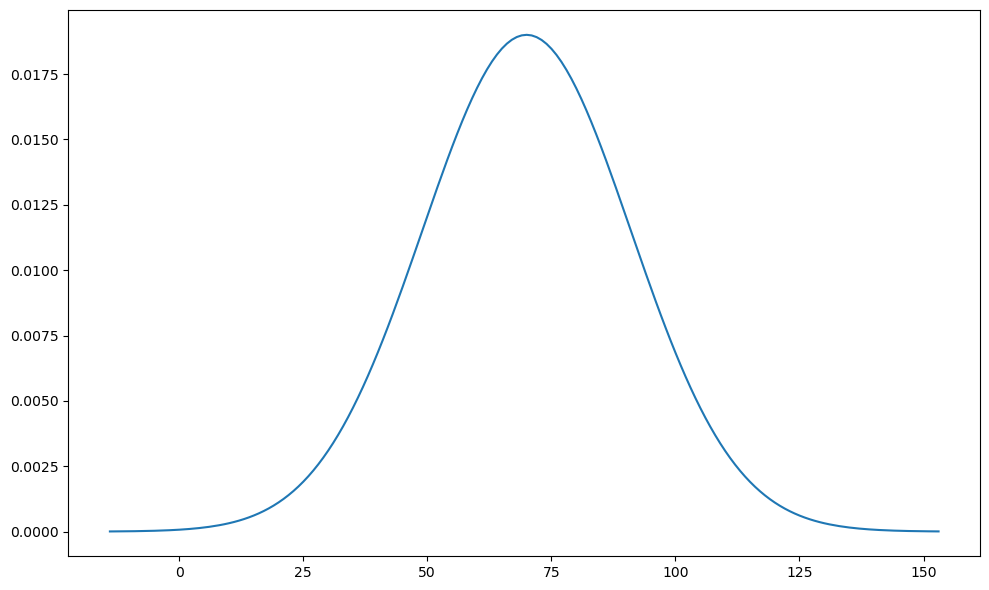

In [88]:
upper_p = p_mean+4*p_std
lower_p = p_mean-4*p_std
arr = np.arange(lower_p,upper_p)
plt.figure(figsize=(10,6))
plt.plot(arr,norm.pdf(arr,p_mean,p_std))
plt.tight_layout()

## INTERPRETATION:

THEN I HAVE PLOTTED THE DISTRIBUTION PLOT IT IS CLEAR THAT EVEN POPULATION MEAN ALSO EVENLY DISTRIBUTED.

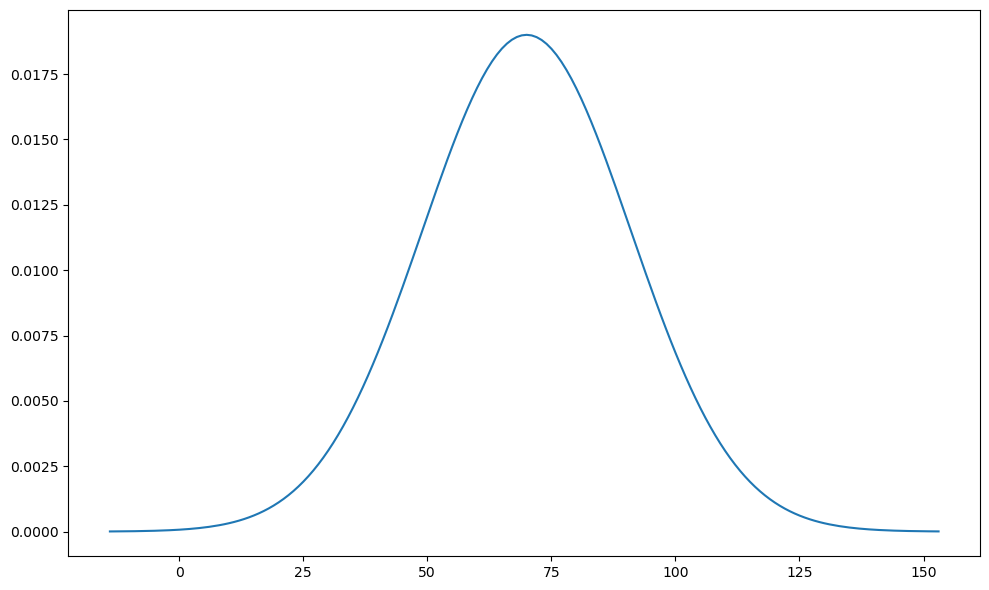

In [90]:
sample_727 = merged_df["minutes_played"]
s_mean = st.mean(merged_df["minutes_played"])
s_std = st.stdev(merged_df["minutes_played"])
lower_p1 = s_mean-4*s_std
upper_p1 = s_mean+4*s_std
arr2 = np.arange(lower_p1,upper_p1)
plt.figure(figsize=(10,6))
plt.plot(arr2,norm.pdf(arr2,s_mean,s_std))
plt.tight_layout()

## INTERPRETATION:

THEN I HAVE PLOTTED THE DISTRIBUTION PLOT FOR SAMPLE MEAN AND IT IS ALSO EVENLY DISTRIBUTED AND THE ACCURACY INCREASES IF YOU TAKE MORE SAMPLES.

# SPRINT 4:

# (i)-LOGISTIC REGRESSION:

### 1. Can we predict whether a player will receive a yellow card in a match based on their position, footedness, goals, assists, and minutes played?

## INTERPRETATION:

I HAVE DONE THE LOGISTIC REGRESSION WHICH IS NOTHING BUT PREDICTION THE CATEGORICAL COLUMN SO I TOOK YELLOW CARDS AS TARGET COLUMN AND OTHERS ARE FEATURE COLUMNS.

In [96]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

## INTERPRETATION:
I HAVE IMPORTED THE NECESSARY LIBRARIES FOR LOGISTIC REGRESSION.

In [98]:
merged_df.head()

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman


In [100]:
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'description',
       'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

In [242]:
feature_col = merged_df[['position_x','position_y','minutes_played','goals','assists','foot']]
feature_col

,position_x,position_y,minutes_played,goals,assists,foot
0,Right-Back,Defender,70,0,0,right
1,Right-Back,Defender,70,0,0,right
2,Right-Back,Defender,70,0,0,right
3,Right-Back,Defender,70,0,0,right
4,Right-Back,Defender,70,0,0,right
...,...,...,...,...,...,...
3632,Centre-Forward,Attack,77,1,0,right
3633,Centre-Forward,Attack,77,1,0,right
3634,Centre-Forward,Attack,77,1,0,right
3635,Centre-Forward,Attack,77,1,0,right


In [244]:
label_encoder = preprocessing.LabelEncoder()
feature_col['position_x_c'] = label_encoder.fit_transform(feature_col['position_x'])
feature_col['position_y_c'] = label_encoder.fit_transform(feature_col['position_y'])
feature_col['foot_c'] = label_encoder.fit_transform(feature_col['foot'])

In [246]:
num_feature = feature_col.drop(columns = ['position_x','position_y','foot'], axis = 1)
num_feature

,minutes_played,goals,assists,position_x_c,position_y_c,foot_c
0,70,0,0,9,1,2
1,70,0,0,9,1,2
2,70,0,0,9,1,2
3,70,0,0,9,1,2
4,70,0,0,9,1,2
...,...,...,...,...,...,...
3632,77,1,0,3,0,2
3633,77,1,0,3,0,2
3634,77,1,0,3,0,2
3635,77,1,0,3,0,2


In [250]:
yel_card = merged_df[['yellow_cards']]
yel_card

,yellow_cards
0,0
1,0
2,0
3,0
4,0
...,...
3632,0
3633,0
3634,0
3635,0


In [252]:
cols = num_feature.columns 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_feature)
df_scaled = pd.DataFrame(df_scaled,columns=cols)
df_scaled

,minutes_played,goals,assists,position_x_c,position_y_c,foot_c
0,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977
1,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977
2,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977
3,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977
4,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977
...,...,...,...,...,...,...
3632,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977
3633,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977
3634,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977
3635,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977


In [254]:
scaled_df = pd.concat([df_scaled,yel_card],axis = 1 )
scaled_df

,minutes_played,goals,assists,position_x_c,position_y_c,foot_c,yellow_cards
0,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
1,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
2,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
3,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
4,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
...,...,...,...,...,...,...,...
3632,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0
3633,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0
3634,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0
3635,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0


In [256]:
scaled_df = pd.concat([df_scaled,yel_card],axis = 1 )
scaled_df

,minutes_played,goals,assists,position_x_c,position_y_c,foot_c,yellow_cards
0,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
1,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
2,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
3,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
4,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
...,...,...,...,...,...,...,...
3632,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0
3633,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0
3634,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0
3635,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0


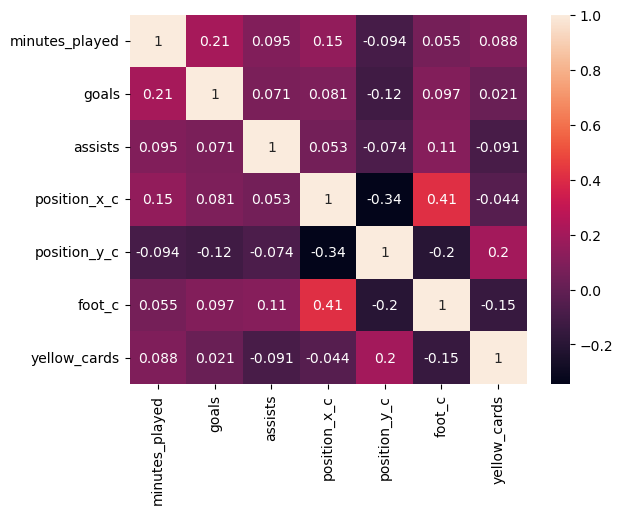

In [258]:
sns.heatmap(scaled_df.corr(), annot = True)
plt.show()

In [276]:
#splitting the data
player_train,player_test = train_test_split(scaled_df,test_size = 0.2 , random_state = 100)
print(player_train.shape)
print(player_test.shape)

(2909, 7)
(728, 7)


In [278]:
X_train = player_train.drop(columns = 'yellow_cards' , axis = 1)
y_train = player_train['yellow_cards']
X_test = player_test.drop(columns = 'yellow_cards' , axis = 1)
y_test = player_test['yellow_cards']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2909, 6)
(2909,)
(728, 6)
(728,)


In [280]:
logreg = LogisticRegression().fit(X_train,y_train)

y_pred = logreg.predict(X_test)
y_pred[0]

0

In [266]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel() 
print(tn,fp,fn,tp)

[[616   2]
 [106   4]]
616 2 106 4


In [268]:
from sklearn.metrics import recall_score

from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

print("recall_score:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))

recall_score: 0.03636363636363636
f1_score: 0.06896551724137931
Accuracy Score: 0.8516483516483516
Precision Score: 0.6666666666666666


## INTERPRETATION:

-- Accuracy: Overall correctness. Good general indicator, but can be misleading with imbalanced data.

--Precision: How many of the positive predictions were correct? Important when false positives are costly.

-- Recall: How many of the actual positives were correctly predicted? Important when false negatives are costly.

-- F1-score: Balances precision and recall. Useful when both are important.

In [282]:
from sklearn.metrics import roc_auc_score  # roc --> receiver operation characteristics score
roc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
print(roc)

0.717188879082083


## INTERPRETATION:
ROC AUC helps evaluate and compare logistic regression models.A higher AUC indicates a better model. It's particularly useful when dealing with imbalanced datasets because it's less sensitive to class distribution than accuracy. If the model score is greater than 0.50 it is consider to be somewhat good model and I got 0.73 which is best model.

In [286]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

<Figure size 700x500 with 0 Axes>

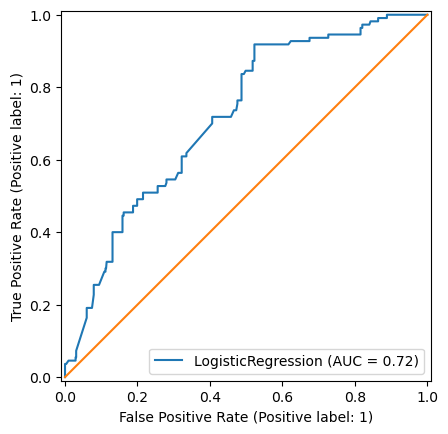

In [288]:
plt.figure(figsize=(7,5))
RocCurveDisplay.from_estimator(logreg,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

## INTERPRETATION:

THE BLUE LINE REPRESENT THE ROC_AUC_CURVE AND THE ORANGE IS ACTUAL PREDICTION SO IT SEEMS TO BE GOOD MODEL. 

### MODEL PERFORMANCE:

The model has high accuracy (85.16%) but poor recall (3.64%), indicating it struggles to detect the minority class. Despite good precision (66.67%), the low F1-score (6.89%) suggests poor overall performance for imbalanced data.

In [ ]:
merged_df.head(2)

# SPRINT 4-(ii)-DESCRIPTIVE ANALYSIS:

### 1. What is the distribution of player market values?

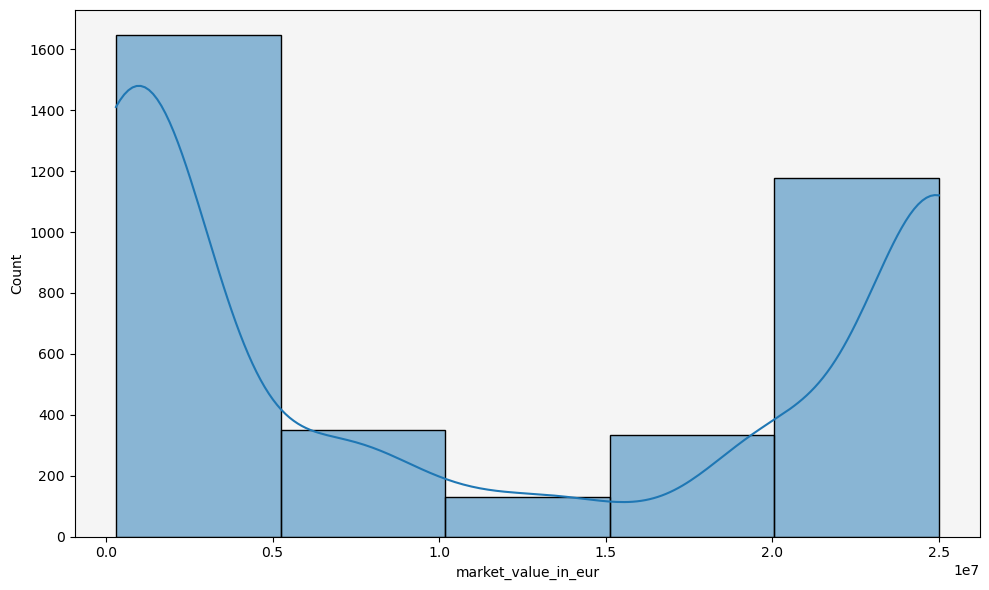

In [290]:
plt.figure(figsize=(10,6))
sns.histplot(merged_df['market_value_in_eur'], bins=5, kde=True)
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

## INTERPRETATION:

I HAVE PLOTTED THE DISTRIBUTION FOR PLAYERS MARKET VALUE USING SEABORN LIBRARY HIST PLOT.

### 2. How does a player’s age impact their market value?

In [293]:
merged_df['date_of_birth'] = pd.to_datetime(merged_df['date_of_birth'])
current_year = pd.to_datetime("today").year
merged_df['age'] = current_year - merged_df['date_of_birth'].dt.year

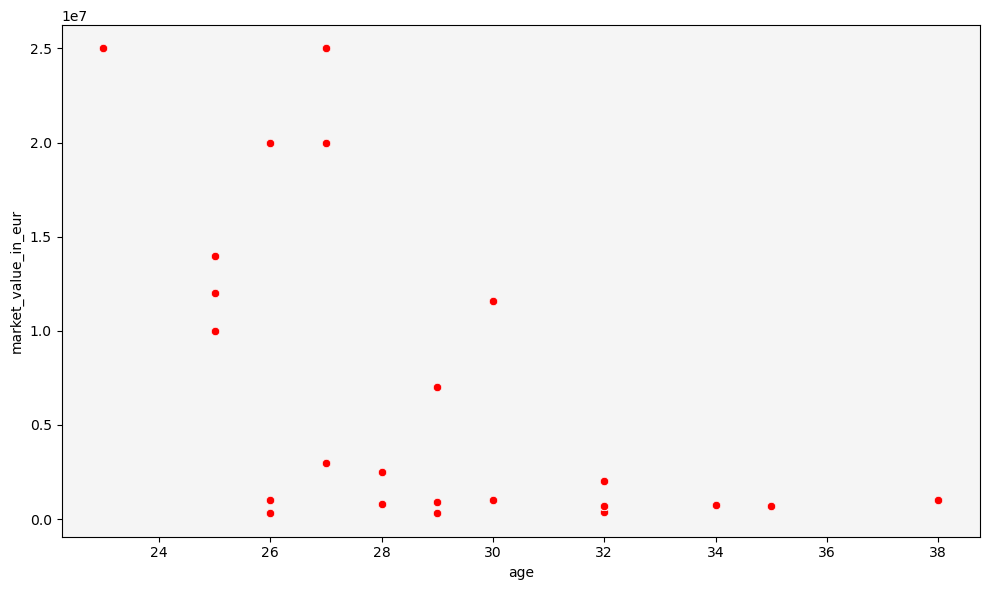

In [294]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=merged_df['age'], y=merged_df['market_value_in_eur'], color='red')
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

## INTERPRETATION:

IN THE ABOVE DESCRIPTIVE I HAVE FOUND THE HOW THE PLAYER'S AGE IMPACT ON THEIR MARKET VALUE SO THE LESS THE AGE THEY GET PAID MORE WITH HIGHER MARKET VALUE. FROM THE ABOVE CHART IT SHOWS THAT PLAYERS WITH AGE BETWEEN 24 TO 30 AGE GET PAID MORE.

### 3. How does market value vary by player position? 

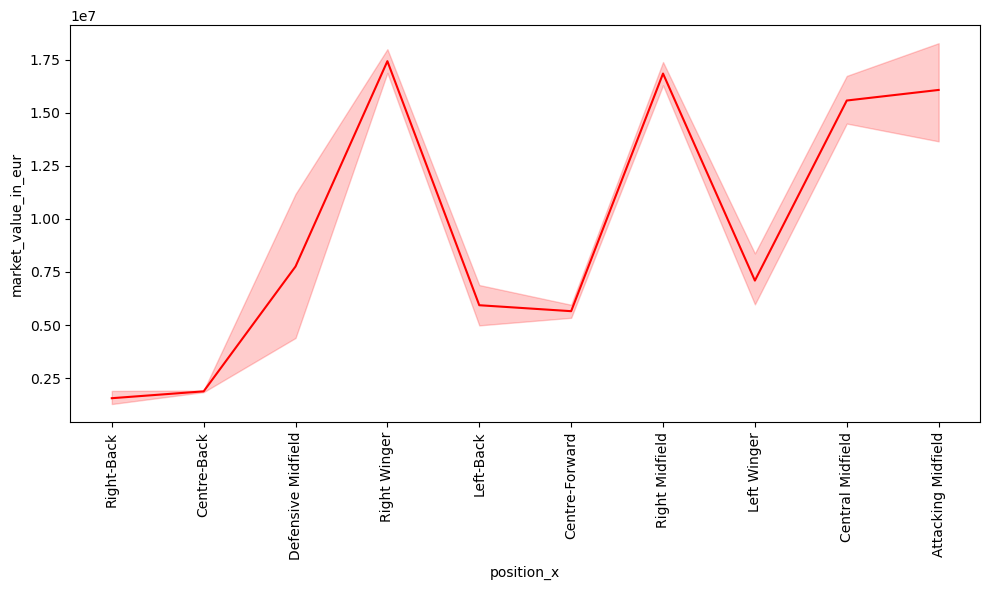

In [297]:
plt.figure(figsize=(10,6))
sns.lineplot(x=merged_df['position_x'], y=merged_df['market_value_in_eur'], color='red')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## INTERPRETATION:

HERE I HAVE VISUALIZED THE PLAYER'S MARKET VALUE BASED ON THEIR POSITION SO IT IS CLEAR THAT RIGHT WINGER ARE PAID MORE WHEN COMPPARED TO THE OTHER POSITION.

# SPRINT 5:

# SIMPLE LINEAR AND MULTI-LINEAR REGRESSION:

### 1. How did you handle potential multicollinearity between the predictor variables (e.g., goals and assists, or height and position)? What methods did you consider or use?

## INTERPRETATION:

SIMPLE LINEAR REGRESSION IS NOTHING BUT PREDICTING THE NUMERICAL COLUMN USING SINGLE FEATURE COLUMN AND MULTI LINEAR IS NOTHING BUT PREDICTING THE SAME NUMERICAL COLUMN USING MULTIPLE FEATURE COLUMNS BASED ON THE HIGHER ACCURACY SCORE WE TAKE THE FEATURE COLUMNS. HERE I HAV ETOOK MARKET_VALUE AS A TARGET COLUMNS AND OTHERS ARE FEATURE COLUMNS.

In [303]:
test_df = pd.read_excel('test data.xlsx')
test_df

,Unnamed: 0,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,4197,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield
1,4198,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield


In [304]:
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'description',
       'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'age'],
      dtype='object')

In [305]:
test_df.columns

Index(['Unnamed: 0', 'appearance_id', 'game_id', 'player_id', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'player_in_id', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'game_lineups_id', 'type_y', 'number',
       'player_name', 'team_captain', 'position_y'],
      dtype='object')

In [306]:
df_1000 = merged_df[['goals','assists','minutes_played','height_in_cm','position_x','position_y','market_value_in_eur','foot','yellow_cards','home_club_goals','away_club_goals','highest_market_value_in_eur']]
df_1000

,goals,assists,minutes_played,height_in_cm,position_x,position_y,market_value_in_eur,foot,yellow_cards,home_club_goals,away_club_goals,highest_market_value_in_eur
0,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0
1,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0
2,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0
3,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0
4,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3632,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0
3633,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0
3634,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0
3635,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0


In [307]:
df_2000 = test_df[['goals','assists','minutes_played','height_in_cm','position_x','position_y','market_value_in_eur','foot','yellow_cards','home_club_goals','away_club_goals','highest_market_value_in_eur']]
df_2000

,goals,assists,minutes_played,height_in_cm,position_x,position_y,market_value_in_eur,foot,yellow_cards,home_club_goals,away_club_goals,highest_market_value_in_eur
0,0,0,58,177,Midfield,Right Midfield,3000000,right,0,4,0,3000000
1,0,0,58,177,Midfield,Central Midfield,3000000,right,0,4,0,3000000


In [308]:
df_3000 = pd.concat([df_1000,df_2000],axis=0, ignore_index=True)
df_3000

,goals,assists,minutes_played,height_in_cm,position_x,position_y,market_value_in_eur,foot,yellow_cards,home_club_goals,away_club_goals,highest_market_value_in_eur
0,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0
1,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0
2,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0
3,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0
4,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3634,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0
3635,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0
3636,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0
3637,0,0,58,177.0,Midfield,Right Midfield,3000000.0,right,0,4,0,3000000.0


In [309]:
#Encoding purpose variable 
foot_encoder = preprocessing.LabelEncoder()
df_3000['foot_enc'] = foot_encoder.fit_transform(df_3000['foot'])
df_3000

,goals,assists,minutes_played,height_in_cm,position_x,position_y,market_value_in_eur,foot,yellow_cards,home_club_goals,away_club_goals,highest_market_value_in_eur,foot_enc
0,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2
1,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2
2,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2
3,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2
4,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2
3635,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2
3636,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2
3637,0,0,58,177.0,Midfield,Right Midfield,3000000.0,right,0,4,0,3000000.0,2


In [310]:
position_x_enc = preprocessing.LabelEncoder()
df_3000['position_x_encode'] = position_x_enc.fit_transform(df_3000['position_x'])
df_3000

,goals,assists,minutes_played,height_in_cm,position_x,position_y,market_value_in_eur,foot,yellow_cards,home_club_goals,away_club_goals,highest_market_value_in_eur,foot_enc,position_x_encode
0,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10
1,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10
2,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10
3,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10
4,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2,3
3635,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2,3
3636,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2,3
3637,0,0,58,177.0,Midfield,Right Midfield,3000000.0,right,0,4,0,3000000.0,2,7


In [311]:
position_y_enc = preprocessing.LabelEncoder()
df_3000['position_y_encode'] = position_y_enc.fit_transform(df_3000['position_y'])
df_3000

,goals,assists,minutes_played,height_in_cm,position_x,position_y,market_value_in_eur,foot,yellow_cards,home_club_goals,away_club_goals,highest_market_value_in_eur,foot_enc,position_x_encode,position_y_encode
0,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10,2
1,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10,2
2,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10,2
3,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10,2
4,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2,3,0
3635,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2,3,0
3636,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2,3,0
3637,0,0,58,177.0,Midfield,Right Midfield,3000000.0,right,0,4,0,3000000.0,2,7,4


In [312]:
#df_3000 = pd.concat([df_1000,df_2000], axis=0, ignore_index=True)
df_3000

,goals,assists,minutes_played,height_in_cm,position_x,position_y,market_value_in_eur,foot,yellow_cards,home_club_goals,away_club_goals,highest_market_value_in_eur,foot_enc,position_x_encode,position_y_encode
0,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10,2
1,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10,2
2,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10,2
3,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10,2
4,0,0,70,186.0,Right-Back,Defender,700000.0,right,0,1,2,5000000.0,2,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2,3,0
3635,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2,3,0
3636,1,0,77,176.0,Centre-Forward,Attack,300000.0,right,0,3,2,600000.0,2,3,0
3637,0,0,58,177.0,Midfield,Right Midfield,3000000.0,right,0,4,0,3000000.0,2,7,4


In [313]:
df_4 = df_3000[['goals', 'assists', 'minutes_played','height_in_cm','foot_enc','position_x_encode','position_y_encode','home_club_goals','away_club_goals','highest_market_value_in_eur']]
df_4

,goals,assists,minutes_played,height_in_cm,foot_enc,position_x_encode,position_y_encode,home_club_goals,away_club_goals,highest_market_value_in_eur
0,0,0,70,186.0,2,10,2,1,2,5000000.0
1,0,0,70,186.0,2,10,2,1,2,5000000.0
2,0,0,70,186.0,2,10,2,1,2,5000000.0
3,0,0,70,186.0,2,10,2,1,2,5000000.0
4,0,0,70,186.0,2,10,2,1,2,5000000.0
...,...,...,...,...,...,...,...,...,...,...
3634,1,0,77,176.0,2,3,0,3,2,600000.0
3635,1,0,77,176.0,2,3,0,3,2,600000.0
3636,1,0,77,176.0,2,3,0,3,2,600000.0
3637,0,0,58,177.0,2,7,4,4,0,3000000.0


In [314]:
df_6 = df_3000[['market_value_in_eur']]
df_6.head(2)

,market_value_in_eur
0,700000.0
1,700000.0


In [315]:
to_join_yellow = df_3000[['yellow_cards']]
to_join_yellow

,yellow_cards
0,0
1,0
2,0
3,0
4,0
...,...
3634,0
3635,0
3636,0
3637,0


In [316]:
to_scale = df_3000[['goals','assists','minutes_played','height_in_cm','market_value_in_eur','foot_enc','position_x_encode','position_y_encode','home_club_goals','away_club_goals','highest_market_value_in_eur']]
to_scale

,goals,assists,minutes_played,height_in_cm,market_value_in_eur,foot_enc,position_x_encode,position_y_encode,home_club_goals,away_club_goals,highest_market_value_in_eur
0,0,0,70,186.0,700000.0,2,10,2,1,2,5000000.0
1,0,0,70,186.0,700000.0,2,10,2,1,2,5000000.0
2,0,0,70,186.0,700000.0,2,10,2,1,2,5000000.0
3,0,0,70,186.0,700000.0,2,10,2,1,2,5000000.0
4,0,0,70,186.0,700000.0,2,10,2,1,2,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...
3634,1,0,77,176.0,300000.0,2,3,0,3,2,600000.0
3635,1,0,77,176.0,300000.0,2,3,0,3,2,600000.0
3636,1,0,77,176.0,300000.0,2,3,0,3,2,600000.0
3637,0,0,58,177.0,3000000.0,2,7,4,4,0,3000000.0


In [317]:
cols_1 = to_scale.columns
scaler = StandardScaler()
df_scaled_1 = scaler.fit_transform(to_scale)


df_scaled_1 = pd.DataFrame(df_scaled_1, columns = cols_1)
df_scaled_1

,goals,assists,minutes_played,height_in_cm,market_value_in_eur,foot_enc,position_x_encode,position_y_encode,home_club_goals,away_club_goals,highest_market_value_in_eur
0,-0.787558,-0.384553,-0.000131,0.680466,-1.004625,0.431836,1.126862,0.899972,-0.596685,0.271960,-0.837109
1,-0.787558,-0.384553,-0.000131,0.680466,-1.004625,0.431836,1.126862,0.899972,-0.596685,0.271960,-0.837109
2,-0.787558,-0.384553,-0.000131,0.680466,-1.004625,0.431836,1.126862,0.899972,-0.596685,0.271960,-0.837109
3,-0.787558,-0.384553,-0.000131,0.680466,-1.004625,0.431836,1.126862,0.899972,-0.596685,0.271960,-0.837109
4,-0.787558,-0.384553,-0.000131,0.680466,-1.004625,0.431836,1.126862,0.899972,-0.596685,0.271960,-0.837109
...,...,...,...,...,...,...,...,...,...,...,...
3634,0.845446,-0.384553,0.333417,-0.882407,-1.041541,0.431836,-1.042630,-0.748240,0.684718,0.271960,-1.017944
3635,0.845446,-0.384553,0.333417,-0.882407,-1.041541,0.431836,-1.042630,-0.748240,0.684718,0.271960,-1.017944
3636,0.845446,-0.384553,0.333417,-0.882407,-1.041541,0.431836,-1.042630,-0.748240,0.684718,0.271960,-1.017944
3637,-0.787558,-0.384553,-0.571927,-0.726120,-0.792361,0.431836,0.197079,2.548184,1.325420,-1.040591,-0.919307


In [318]:
merge_1 = pd.concat([df_scaled_1,to_join_yellow], axis=1)
merge_1

,goals,assists,minutes_played,height_in_cm,market_value_in_eur,foot_enc,position_x_encode,position_y_encode,home_club_goals,away_club_goals,highest_market_value_in_eur,yellow_cards
0,-0.787558,-0.384553,-0.000131,0.680466,-1.004625,0.431836,1.126862,0.899972,-0.596685,0.271960,-0.837109,0
1,-0.787558,-0.384553,-0.000131,0.680466,-1.004625,0.431836,1.126862,0.899972,-0.596685,0.271960,-0.837109,0
2,-0.787558,-0.384553,-0.000131,0.680466,-1.004625,0.431836,1.126862,0.899972,-0.596685,0.271960,-0.837109,0
3,-0.787558,-0.384553,-0.000131,0.680466,-1.004625,0.431836,1.126862,0.899972,-0.596685,0.271960,-0.837109,0
4,-0.787558,-0.384553,-0.000131,0.680466,-1.004625,0.431836,1.126862,0.899972,-0.596685,0.271960,-0.837109,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3634,0.845446,-0.384553,0.333417,-0.882407,-1.041541,0.431836,-1.042630,-0.748240,0.684718,0.271960,-1.017944,0
3635,0.845446,-0.384553,0.333417,-0.882407,-1.041541,0.431836,-1.042630,-0.748240,0.684718,0.271960,-1.017944,0
3636,0.845446,-0.384553,0.333417,-0.882407,-1.041541,0.431836,-1.042630,-0.748240,0.684718,0.271960,-1.017944,0
3637,-0.787558,-0.384553,-0.571927,-0.726120,-0.792361,0.431836,0.197079,2.548184,1.325420,-1.040591,-0.919307,0


In [319]:
abs(merge_1.corr())>=0.7

,goals,assists,minutes_played,height_in_cm,market_value_in_eur,foot_enc,position_x_encode,position_y_encode,home_club_goals,away_club_goals,highest_market_value_in_eur,yellow_cards
goals,True,False,False,False,False,False,False,False,False,False,False,False
assists,False,True,False,False,False,False,False,False,False,False,False,False
minutes_played,False,False,True,False,False,False,False,False,False,False,False,False
height_in_cm,False,False,False,True,False,False,False,False,False,False,False,False
market_value_in_eur,False,False,False,False,True,False,False,False,False,False,True,False
foot_enc,False,False,False,False,False,True,False,False,False,False,False,False
position_x_encode,False,False,False,False,False,False,True,False,False,False,False,False
position_y_encode,False,False,False,False,False,False,False,True,False,False,False,False
home_club_goals,False,False,False,False,False,False,False,False,True,False,False,False
away_club_goals,False,False,False,False,False,False,False,False,False,True,False,False


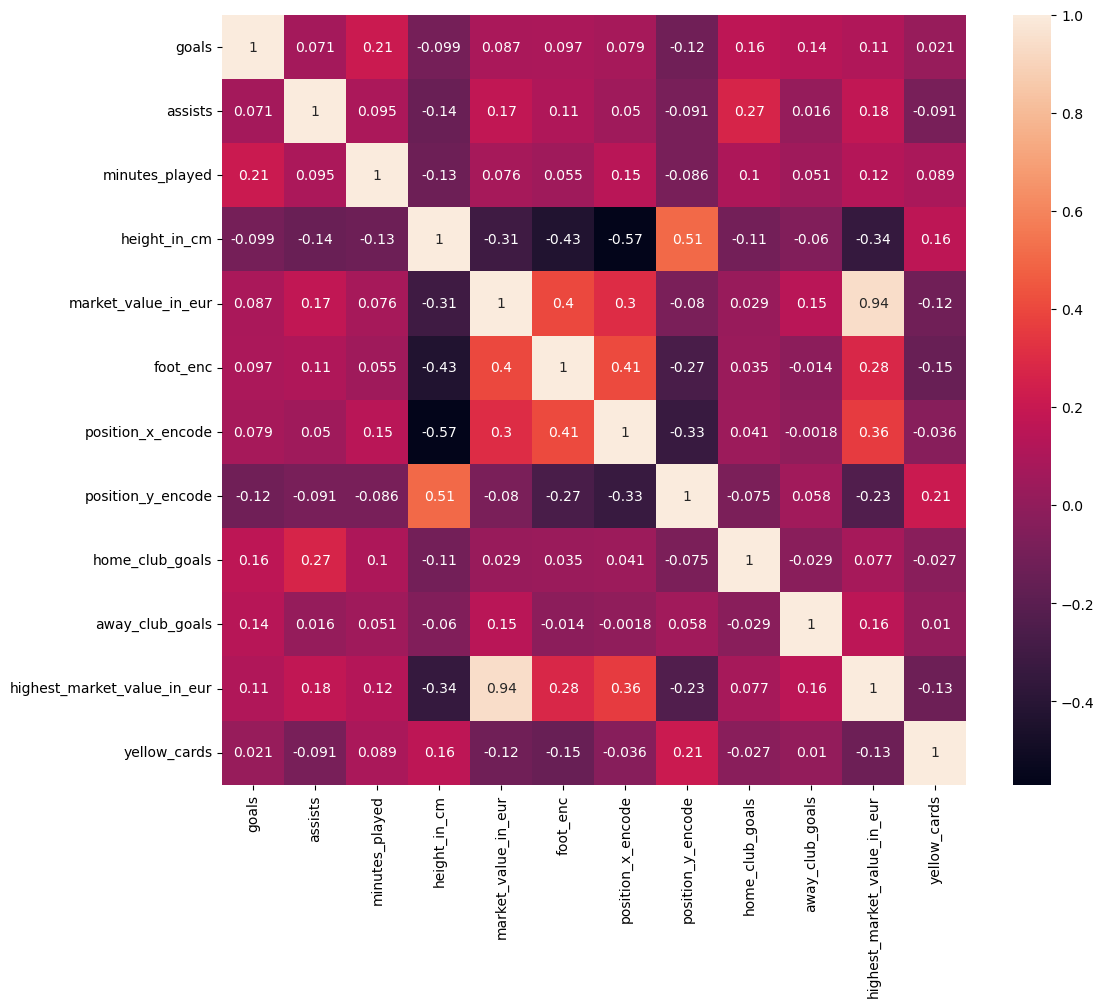

In [320]:
plt.figure(figsize=(12, 10))
sns.heatmap(merge_1.corr(), annot=True)
plt.show()

In [321]:
sorted_corr = merge_1.corr()[['market_value_in_eur']].sort_values('market_value_in_eur', ascending=False)
sorted_corr

,market_value_in_eur
market_value_in_eur,1.000000
highest_market_value_in_eur,0.940163
foot_enc,0.402559
position_x_encode,0.304321
assists,0.173218
away_club_goals,0.145157
goals,0.087231
minutes_played,0.075920
home_club_goals,0.029487
position_y_encode,-0.080178


In [322]:
## 1.00 IS BECAUSE WHAT (MARKET_VALUE IN EURO AND HIGHEST MARKET VALUE IN EURO)

In [323]:
X_1=np.array(merge_1[['highest_market_value_in_eur']]).reshape(-1,1)

y_1=np.array(merge_1['market_value_in_eur'])

In [324]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1,y_1, test_size = 0.3, random_state = 200)
mult_model = LinearRegression().fit(X_train1, y_train1)
y_pred1=mult_model.predict(X_test1)
print('y_pred1:',y_pred1[0])

print('intercept:',mult_model.intercept_)
print('coeff:',mult_model.coef_)

y_pred1: -0.009835910919210614
intercept: 0.004423882375632198
coeff: [0.94230949]


## INTERPRETATION:

--y_prediction represents the predicted values of the dependent variable (y) based on the linear relationship it has with the independent variable(s) (x).

--Intercept is the point where the regression line crosses the y-axis. It represents the predicted value of the dependent variable (y) when the independent variable (x) is zero.

--Coefficient (also called the slope) indicates how much the dependent variable (y) is expected to change for every one-unit change in the independent variable (x).

In [326]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [327]:
MSE1= mean_squared_error(y_test1,y_pred1)
print('MSE:',MSE1)
MAE1= mean_absolute_error(y_test1,y_pred1)
print('MAE:',MAE1)
RMSE1= mean_squared_error(y_test1,y_pred1,squared=False)
print('RMSE:',RMSE1)
R2_1 = r2_score(y_test1,y_pred1)
print('R2:',R2_1)

MSE: 0.11010229638834607
MAE: 0.24124738558483516
RMSE: 0.3318166608058523
R2: 0.8893607206530659


## INTERPRETATION:
--Mean Squared Error (MSE): The average of the squared differences between the predicted and actual values.  Lower MSE is better.  It penalizes larger errors more heavily.

--Mean Absolute Error (MAE): The average of the absolute differences between the predicted 1  and actual values. Lower MAE is better.  It's less sensitive to outliers than MSE.   

--Root Mean Squared Error (RMSE): The square root of the MSE.  It's on the same scale as the target variable, making it easier to interpret. Lower RMSE is better.

--R-squared (R2):  Represents the proportion of variance in the dependent variable explained by the model.  Ranges from 0 to 1. Higher R2 is generally better, but doesn't guarantee a good model (overfitting is a risk).  It indicates how well the model fits the data.

In [329]:
X_2=np.array(merge_1[['foot_enc','highest_market_value_in_eur']]).reshape(-1,2)

y_2=np.array(merge_1['market_value_in_eur'])

In [330]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2,y_2, test_size = 0.3, random_state = 200)
mult_model_2 = LinearRegression().fit(X_train2, y_train2)
y_pred2=mult_model_2.predict(X_test2)
print('y_pred2:',y_pred2[0])

print('intercept_2:',mult_model_2.intercept_)
print('coeff_2:',mult_model_2.coef_)

y_pred2: 0.058234267501625504
intercept_2: 0.006184177395339082
coeff_2: [0.15202078 0.89857353]


In [331]:
MSE2= mean_squared_error(y_test2,y_pred2)
print('MSE:',MSE2)
MAE2= mean_absolute_error(y_test2,y_pred2)
print('MAE:',MAE2)
RMSE2= mean_squared_error(y_test2,y_pred2,squared=False)
print('RMSE:',RMSE2)
R2_2 = r2_score(y_test2,y_pred2)
print('R2:',R2_2)

MSE: 0.0896971550598112
MAE: 0.23190705188697344
RMSE: 0.2994948331103747
R2: 0.9098653804614184


In [332]:
X_3=np.array(merge_1[['foot_enc','position_x_encode','assists']]).reshape(-1,3)

y_3=np.array(merge_1['market_value_in_eur'])

In [333]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3,y_3, test_size = 0.3, random_state = 200)
mult_model_3 = LinearRegression().fit(X_train3, y_train3)
y_pred3=mult_model_3.predict(X_test3)
print('y_pred3:',y_pred3[0])

print('intercept_3:',mult_model_3.intercept_)
print('coeff_3:',mult_model_3.coef_)

y_pred3: -0.1695195727552803
intercept_3: 0.0015733314253488836
coeff_3: [0.32203269 0.15593735 0.13239983]


In [334]:
MSE3= mean_squared_error(y_test3,y_pred3)
print('MSE:',MSE3)
MAE3= mean_absolute_error(y_test3,y_pred3)
print('MAE:',MAE3)
RMSE3= mean_squared_error(y_test3,y_pred3,squared=False)
print('RMSE:',RMSE3)
R2_3 = r2_score(y_test3,y_pred3)
print('R2:',R2_3)

MSE: 0.796698603517402
MAE: 0.7862139646631803
RMSE: 0.8925797463069627
R2: 0.19941579566178702


In [335]:
X_4=np.array(merge_1[['goals','minutes_played','assists','yellow_cards','foot_enc','position_y_encode','position_x_encode','highest_market_value_in_eur']]).reshape(-1,8)

y_4=np.array(merge_1['market_value_in_eur'])

In [336]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4,y_4, test_size = 0.2, random_state = 200)
mult_model_4 = LinearRegression().fit(X_train4, y_train4)
y_pred4=mult_model_4.predict(X_test4)
print('y_pred4:',y_pred4[0])

print('intercept_4:',mult_model_4.intercept_)
print('coeff_4:',mult_model_4.coef_)

y_pred4: 0.4836526354292693
intercept_4: 0.0052460722572804505
coeff_4: [-0.0090254  -0.02513097  0.0048861  -0.01167925  0.21058021  0.17983009
 -0.05780162  0.94612147]


In [337]:
MSE4= mean_squared_error(y_test4,y_pred4)
print('MSE:',MSE4)
MAE4= mean_absolute_error(y_test4,y_pred4)
print('MAE:',MAE3)
RMSE4= mean_squared_error(y_test4,y_pred4,squared=False)
print('RMSE:',RMSE4)
R2_4 = r2_score(y_test4,y_pred4)
print('R2:',R2_4)

MSE: 0.05724417512759473
MAE: 0.7862139646631803
RMSE: 0.23925754978180883
R2: 0.9436194751167116


### MODEL PERFORMANCE:

The model has a **high R² (0.94)**, indicating a good fit.  
Errors are **low (MSE: 0.057, RMSE: 0.239, MAE: 0.26)**, showing accurate predictions.  
Overall, the model performs well in predicting market value.

In [338]:
def calculating_residuals(model,features,label):
    Predictions=model.predict(features)
    df_results=pd.DataFrame({"Actual":label,"Predictions":Predictions})
    df_results["Residuals"]=abs(df_results["Actual"])-abs(df_results["Predictions"])
    return df_results
def Linear_regression(model,feature,label):
    df_results=calculating_residuals(model,feature,label)
    sns.lmplot(x="Actual",y="Predictions",data=df_results,fit_reg=False)
    line_cords=np.arange(df_results.min().min(),df_results.max().max())
    plt.plot(line_cords,line_cords,color="red",linestyle="--")
    plt.title("Linear Regression plot")

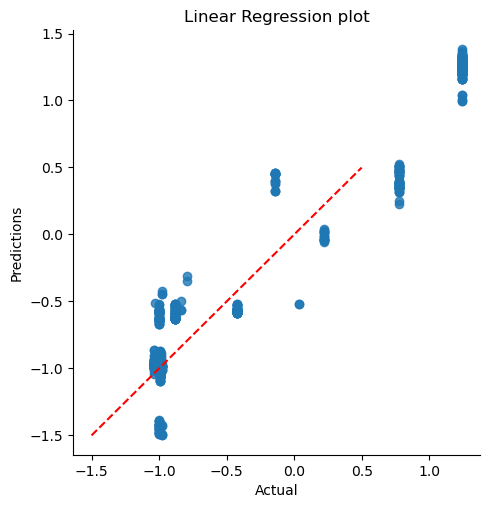

In [339]:
Linear_regression(mult_model_4,X_test4,y_test4)

### RESIDUAL SCORE:
The code calculates and plots predictions against actual values to visually assess a linear regression model's performance.  Points clustered tightly around the red (perfect prediction) line indicate better model fit.  The absolute residual calculation used in the code means the plot doesn't directly show the direction of errors, but the spread of points around the line still gives a general sense of accuracy.

In [341]:
def homoscadecity_assumption(model,feature,label):
    df_results=calculating_residuals(model,feature,label)
    plt.subplots(figsize=(7,5))
    ax=plt.subplot(111) # to remove spine
    plt.scatter(x=df_results.index,y=df_results.Residuals,alpha=0.5)
    plt.plot(np.repeat(0,df_results.index.max()),color="red",linestyle="--")
    plt.title("Linear_ Assumption Plot")
    plt.xlabel("Index value")
    plt.ylabel("Residual value")
    plt.show()

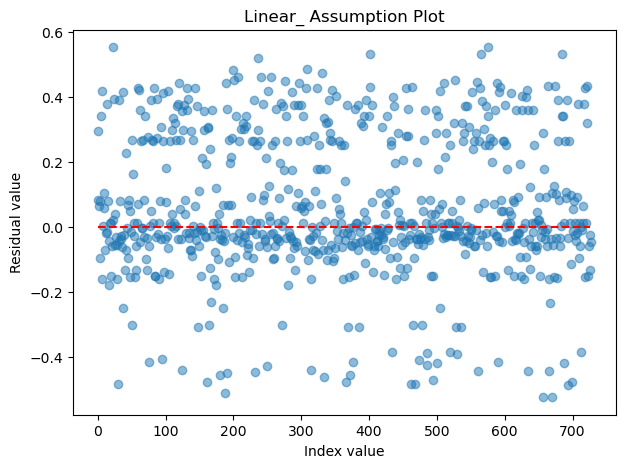

In [342]:
homoscadecity_assumption(mult_model_4,X_test4,y_test4)

#residual value 

it is the difference b/w the actual value and predicted value in a 

### HOMOSCADECITY ASSUMPTION:

The plot checks if residuals (prediction errors) have consistent spread across the data.  A random scatter of points around the red line suggests the model's errors are evenly distributed (homoscedasticity), which is good.  This indicates the linear regression assumptions are likely met.

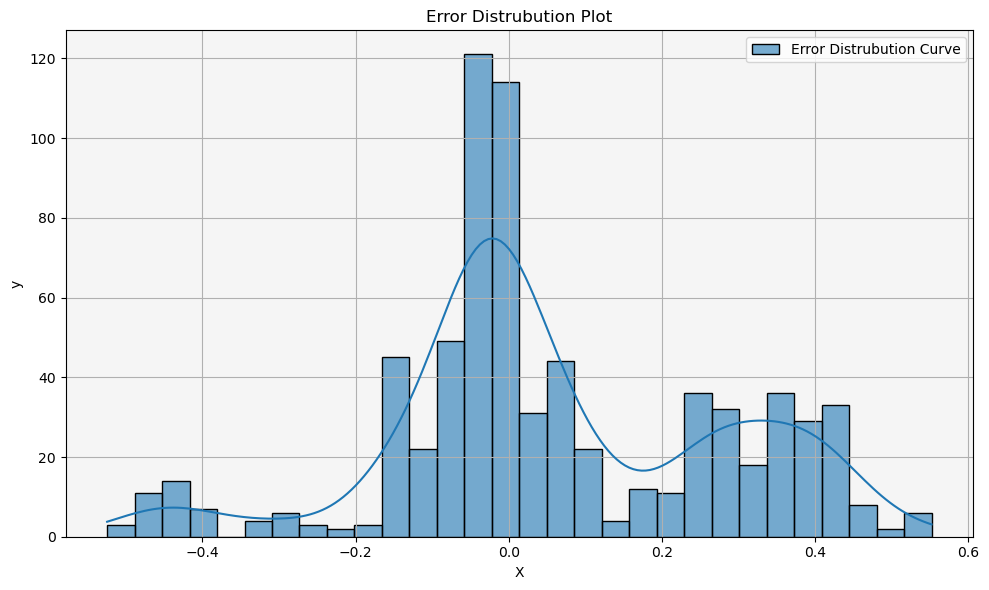

In [345]:
df_results=calculating_residuals(mult_model_4,X_test4,y_test4)
plt.figure(figsize=(10,6))
sns.histplot(df_results.Residuals,bins=30,label="Error Distrubution Curve",alpha=0.6,kde=True)
plt.gca().set_facecolor('whitesmoke')
plt.title("Error Distrubution Plot")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### ERROR DISTRIBUTION PLOT:

The error distribution plot (also called a histogram of residuals) shows how frequently different error sizes occur in my model's predictions. Ideally, we want a bell-shaped curve (normal distribution) centered around zero, indicating that most errors are small and random. The error distribution plot shows a non-normal, skewed distribution, indicating potential outliers or bias in predictions. The peaks suggest concentrated errors around zero, but the spread hints at variance that could affect model reliability.

# SPRINT 6:

### (i)TEAM COMPARISION:

### 1. Which team has the highest average goals scored per match over the season?

In [350]:
home_goals = merged_df.groupby('home_club_name')['home_club_goals'].mean().reset_index()
home_goals = home_goals.rename(columns={'home_club_goals': 'avg_home_goals'})
home_goals

,home_club_name,avg_home_goals
0,Lille Olympique Sporting Club,2.000000
1,1. FC Koln,2.682927
2,1. FSV Mainz 05,0.757576
3,1.FC Nuremberg,1.422680
4,AC Horsens,2.607143
...,...,...
100,Yellow-Red Koninklijke Voetbalclub Mechelen,1.000000
101,club atletico de madrid sad,2.000000
102,spvgg greuther furth games,1.000000
103,valencia club de futbol s.a.d,2.000000


In [351]:
home_team_sorted = home_goals.sort_values(by='avg_home_goals', ascending=False)
home_team_sorted.head()

,home_club_name,avg_home_goals
60,Manchester City Football Club,6.615385
59,Liverpool Football Club,6.000000
32,FC Bayern Munich,5.333333
27,Eindhovense Voetbalvereniging Philips Sport Ve...,5.000000
5,AFC Ajax Amsterdam,4.605263


In [352]:
away_goals = merged_df.groupby('away_club_name')['away_club_goals'].mean().reset_index()
away_goals = away_goals.rename(columns={'away_club_goals': 'avg_away_goals'})
away_goals

,away_club_name,avg_away_goals
0,1. FC Koin,2.466667
1,1. FC Union Berlin,1.933333
2,1. FSV Mainz 05,1.437500
3,1.FC Nuremberg,1.428571
4,AC Horsens,0.333333
...,...,...
98,Willem II Tilburg,4.000000
99,Wolverhampton Wanderers Football Club,0.000000
100,bayer 04 leverkusen Football,1.985294
101,eintracht frankfurt Football ag,1.634615


In [353]:
team_sorted_2 = away_goals.sort_values(by='avg_away_goals', ascending=False)
team_sorted_2.head()

,away_club_name,avg_away_goals
10,Arsenal Football Club,5.000000
52,Koninklijke Racing Club Genk,5.000000
27,FC Bayern Munich,4.162500
98,Willem II Tilburg,4.000000
6,AFC Ajax Amsterdam,3.956522


## INTERPRETATION:

HERE, I HAVE COMPARED THE TEAMS BASED ON THEIR AVERAGE GOALS FIRST I HAVE TOOK THE HOME CLUB TEAM AND THEIR AVERAGE GOALS AND AWAY CLUB TEAMS AND THEIR AVERAGE GOALS AND I RANKED THEM IN DESCENDING ORDER.

### 2. How do home vs. away performances compare across teams in terms of average goals scored?

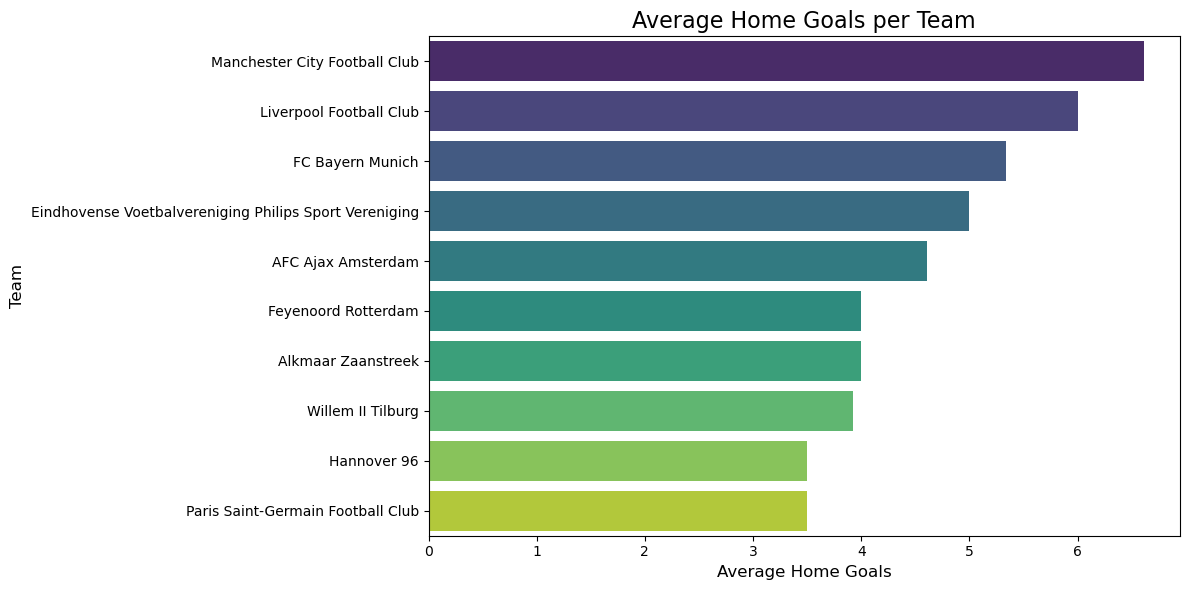

In [356]:
team_goals = merged_df.groupby('home_club_name')['home_club_goals'].mean().reset_index()
team_goals = team_goals.rename(columns={'home_club_goals': 'avg_home_goals'})

team_goals_sorted = team_goals.sort_values(by='avg_home_goals', ascending=False)

top_10_sorted = team_goals_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='avg_home_goals', y='home_club_name', data=top_10_sorted, palette='viridis')

plt.title('Average Home Goals per Team', fontsize=16)
plt.xlabel('Average Home Goals', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

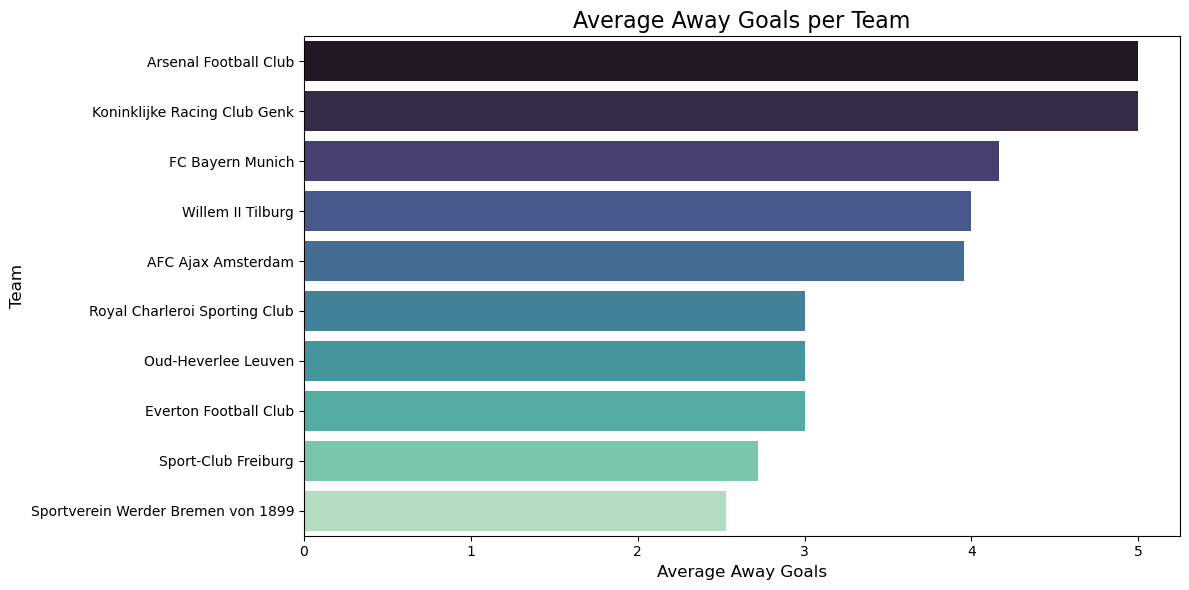

In [357]:
team_goals1 = merged_df.groupby('away_club_name')['away_club_goals'].mean().reset_index()
team_goals1= team_goals1.rename(columns={'away_club_goals': 'avg_away_goals'})

team_goals_sorted1= team_goals1.sort_values(by='avg_away_goals', ascending=False)

top_10_sorted1 = team_goals_sorted1.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='avg_away_goals', y='away_club_name', data=top_10_sorted1, palette='mako')

plt.title('Average Away Goals per Team', fontsize=16)
plt.xlabel('Average Away Goals', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## INTERPRETATION:

HERE, I HAVE VISUALIZED THE ABOVE ANSWER IN COLUMN CHART TO EASY FOR UNDERSTANDING.

# (ii)HYPOTHESIS USING PYTHON:

### 1. Is there a significant difference between the  number of goals scored by home teams and away teams?

In [361]:
required_hypothesis_data1 = merged_df.loc[:,["home_club_goals"]]
required_hypothesis_data1.head()

,home_club_goals
0,1
1,1
2,1
3,1
4,1


In [362]:
sample_data1 = required_hypothesis_data1.sample(n=30,replace=True,random_state=1)
sample_data1.head()

,home_club_goals
1061,2
235,1
1096,6
905,0
2763,2


## HYPOTHESIS:


--H0: There is no significant difference between the number of goals scored by home teams and away teams.

--H1: There is significant difference between the Number of goals score by home teams and away teams

In [364]:
import statistics as st
import math as m

In [365]:
p1_mean=st.mean(required_hypothesis_data1["home_club_goals"])
p1_std=st.stdev(required_hypothesis_data1["home_club_goals"])
p1_variance=st.variance(required_hypothesis_data1["home_club_goals"])
s1_mean=st.mean(sample_data1['home_club_goals'])
s1_std=st.stdev(sample_data1['home_club_goals'])
s1_variance=st.variance(sample_data1["home_club_goals"])

In [366]:
print("population_mean_1:",p1_mean)
print("population_STD_1:",p1_std)
print("population_variance_1:",p1_variance)
print("sample_mean_1:",s1_mean)
print("sample_STD_1:",s1_std)
print("sample_variance_1:",s1_variance)

population_mean_1: 1.930162221611218
population_STD_1: 1.5606778664156853
population_variance_1: 2.4357154027198153
sample_mean_1: 1.7333333333333334
sample_STD_1: 1.5959719411009734
sample_variance_1: 2.547126436781609


In [367]:
required_hypothesis_data2 = merged_df.loc[:,["away_club_goals"]]
required_hypothesis_data2.head()

,away_club_goals
0,2
1,2
2,2
3,2
4,2


In [368]:
sample_data2=required_hypothesis_data2.sample(n=30,replace=True,random_state=1)
sample_data2.head()

,away_club_goals
1061,1
235,0
1096,0
905,1
2763,4


In [369]:
p2_mean=st.mean(required_hypothesis_data2["away_club_goals"])
p2_std=st.stdev(required_hypothesis_data2["away_club_goals"])
p2_variance=st.variance(required_hypothesis_data2["away_club_goals"])
s2_mean=st.mean(required_hypothesis_data2["away_club_goals"])
s2_std=st.stdev(required_hypothesis_data2["away_club_goals"])
s2_variance=st.variance(required_hypothesis_data2["away_club_goals"])

In [370]:
print("population_mean_2:",p2_mean)
print("population_STD_2:",p2_std)
print("population_variance_2:",p2_variance)
print("sample_mean_2:",s2_mean)
print("sample_STD_2:",s2_std)
print("sample_variance_2:",s2_variance)

population_mean_2: 1.5864723673357162
population_STD_2: 1.523924934454003
population_variance_2: 2.322347205850637
sample_mean_2: 1.5864723673357162
sample_STD_2: 1.523924934454003
sample_variance_2: 2.322347205850637


In [371]:
n1=len(sample_data1)
n2=len(sample_data2)
dof = n1+n2-2
print("length of sample_1:",n1)
print("length of sample_2:",n2)
print("Degrees of Freedom:",dof)

length of sample_1: 30
length of sample_2: 30
Degrees of Freedom: 58


In [372]:
x1=s1_mean
x2=s2_mean
v1=s1_variance
v2=s2_variance
p1=p1_mean
p2=p2_mean
alpha=0.5

In [373]:
signal=abs(x1-x2)
noise=m.sqrt((v1*(n1-1+(v2*(n2-2)))*((1/n1+1/n2))))
t_statistics=signal/noise
print("The t_statistics values are:",t_statistics)
p_value=t.sf(abs(t_statistics),dof)
print("The p_values are:",p_value)
t_critical=norm.ppf(alpha/2,dof)
print("The t_critical values are:",t_critical)

The t_statistics values are: 0.036753899240345236
The p_values are: 0.4854037206592319
The t_critical values are: 57.32551024980392



### HYPOTHESIS:

-- P-value is less than significance value (alpha) so reject the null hypothesis.

-- t-statistics is less than t-critical value but reject the null hypothesis. So, There is significant difference between the Number of goals score by home teams and away teams.

# SPRINT 7:

### TASK 1:

### 1. Which Stadiums Have the Highest Average Attendance?

In [378]:
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'description',
       'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'age'],
      dtype='object')

In [379]:
stadium_avg_attendance = merged_df.groupby('stadium')['attendance'].mean()
stadium_avg_attendance = pd.DataFrame(stadium_avg_attendance)
stadium_avg_attendance

,attendance
stadium,
Bremer Brucke,15780.000000
AFAS Stadion,13823.000000
AMEX Stadium,30559.000000
Aalborg Portland Park,5263.925926
Allianz Arena,74666.666667
...,...
Volkswagen Arena,28967.047592
WWK ARENA,26961.056768
Wembley Stadium,45352.529832


In [380]:
stadium_avg_attendance = stadium_avg_attendance.sort_values(by='attendance', ascending=False)
stadium_avg_attendance = pd.DataFrame(stadium_avg_attendance)
stadium_analysis_1 = stadium_avg_attendance.head(20)
stadium_analysis_1

,attendance
stadium,
Santiago Bernabeu,76894.000000
Allianz Arena,74666.666667
SIGNAL IDUNA PARK,73494.472041
Civitas Metropolitano,61023.000000
Mercedes-Benz Arena,58605.058824
Veltins-Arena,56254.601432
Volksparkstadion,54981.000000
Johan Cruijff ArenA,53419.763158
Etihad Stadium,51736.769231


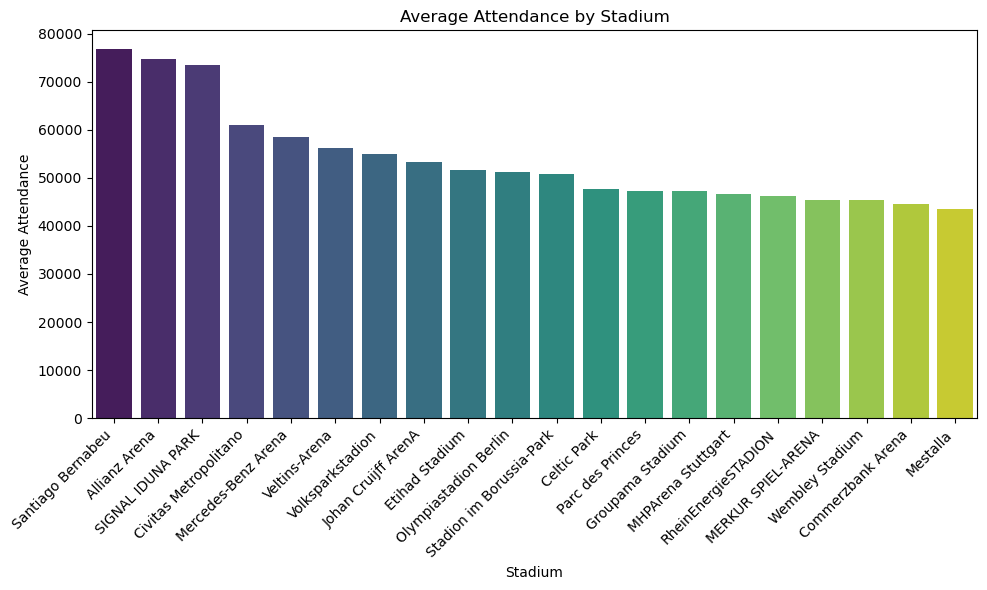

In [381]:
plt.figure(figsize=(10, 6))
sns.barplot(data=stadium_analysis_1, x='stadium', y='attendance', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Average Attendance by Stadium")
plt.xlabel("Stadium")
plt.ylabel("Average Attendance")
plt.tight_layout()
plt.show()

## INTERPRETATION:

HERE, I HAVE CALCULATED THE AVERAGE STADIUM ATTENDANCE, SO I GROUPED THE STADIUM AND CALCULATED THE MEAN FOR ATTENDANCE AND I TOOKM TOP 5 BASED ON HIGHEST ATTENDANCE AND VISUALIZED IN BAR CHART.

### 2. How Does Attendance Distribution Differ Across Top 10 Stadiums?

In [384]:
stadium_avg_attendance = merged_df.groupby('stadium')['attendance'].mean().sort_values(ascending=False).head(10)
stadium_avg_attendance = pd.DataFrame(stadium_avg_attendance)
stadium_avg_attendance

,attendance
stadium,
Santiago Bernabeu,76894.000000
Allianz Arena,74666.666667
SIGNAL IDUNA PARK,73494.472041
Civitas Metropolitano,61023.000000
Mercedes-Benz Arena,58605.058824
Veltins-Arena,56254.601432
Volksparkstadion,54981.000000
Johan Cruijff ArenA,53419.763158
Etihad Stadium,51736.769231


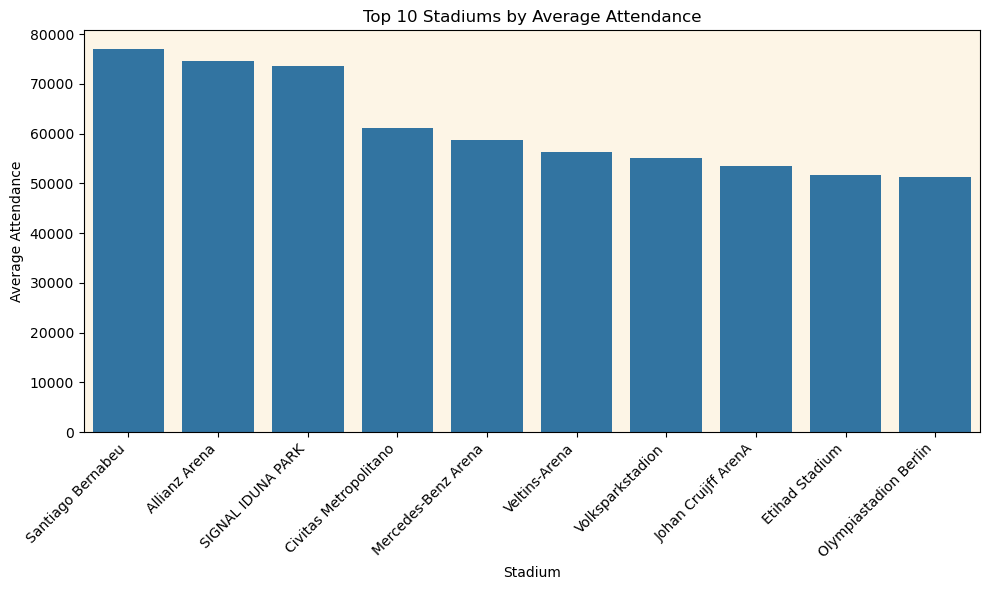

In [385]:
plt.figure(figsize=(10, 6))
sns.barplot(x=stadium_avg_attendance.index, y=stadium_avg_attendance["attendance"])
plt.gca().set_facecolor('oldlace')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Stadiums by Average Attendance")
plt.xlabel("Stadium")
plt.ylabel("Average Attendance")
plt.tight_layout()
plt.show()

## INTERPRETATION:

HERE, I HAVE CALCULATED THE AVERAGE STADIUM ATTENDANCE DISTRIBUTION, SO I GROUPED THE STADIUM AND CALCULATED THE MEAN FOR ATTENDANCE AND I ORDERED THEM BASED ON HIGHEST ATTENDANCE AND VISUALIZED IN BAR CHART.

# SPRINT - 7 (ii):

# K NEAREST NEIGHBOR CLASSIFICATION:

### 1. What is the objective of using K-Nearest Neighbors (KNN) for predicting yellow cards?

## DEFINITION:

K-Nearest Neighbors (KNN) is a simple supervised machine learning algorithm used for both classification and regression. It predicts the class or value of a new data point based on the classes or values of its k nearest neighbors in the training data.  Essentially, it looks at the k closest data points and makes a prediction based on what those neighbors are. Here I took attendance columns as target column and others are feature columns.

In [391]:
merged_df_6 = merged_df[['goals','minutes_played','season','attendance','competition_type','yellow_cards','red_cards']]
merged_df_6

,goals,minutes_played,season,attendance,competition_type,yellow_cards,red_cards
0,0,70,2012,45033.0,domestic_league,0,0
1,0,70,2012,45033.0,domestic_league,0,0
2,0,70,2012,45033.0,domestic_league,0,0
3,0,70,2012,45033.0,domestic_league,0,0
4,0,70,2012,45033.0,domestic_league,0,0
...,...,...,...,...,...,...,...
3632,1,77,2020,3200.0,domestic_league,0,0
3633,1,77,2020,3200.0,domestic_league,0,0
3634,1,77,2020,3200.0,domestic_league,0,0
3635,1,77,2020,3200.0,domestic_league,0,0


In [392]:
test_df_1  = test_df[['goals','minutes_played','season','attendance','competition_type','yellow_cards','red_cards']]
test_df_1

,goals,minutes_played,season,attendance,competition_type,yellow_cards,red_cards
0,0,58,2020,3908,domestic_league,0,0
1,0,58,2020,3908,domestic_league,0,0


In [393]:
merged_df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   goals             3637 non-null   int64  
 1   minutes_played    3637 non-null   int64  
 2   season            3637 non-null   int64  
 3   attendance        3637 non-null   float64
 4   competition_type  3637 non-null   object 
 5   yellow_cards      3637 non-null   int64  
 6   red_cards         3637 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 199.0+ KB


In [394]:
knn_1 = merged_df_6

In [395]:
knn_required_df=knn_1[["goals","minutes_played","season","competition_type","yellow_cards","attendance","red_cards"]]
knn_required_test=test_df_1[["goals","minutes_played","season","competition_type","yellow_cards","attendance","red_cards"]]


In [396]:
knn_df=pd.concat([knn_required_df,knn_required_test], axis=0, ignore_index=True)
knn_df

,goals,minutes_played,season,competition_type,yellow_cards,attendance,red_cards
0,0,70,2012,domestic_league,0,45033.0,0
1,0,70,2012,domestic_league,0,45033.0,0
2,0,70,2012,domestic_league,0,45033.0,0
3,0,70,2012,domestic_league,0,45033.0,0
4,0,70,2012,domestic_league,0,45033.0,0
...,...,...,...,...,...,...,...
3634,1,77,2020,domestic_league,0,3200.0,0
3635,1,77,2020,domestic_league,0,3200.0,0
3636,1,77,2020,domestic_league,0,3200.0,0
3637,0,58,2020,domestic_league,0,3908.0,0


In [397]:
yellow_red_df = knn_df[['yellow_cards','red_cards']]
yellow_red_df

,yellow_cards,red_cards
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3634,0,0
3635,0,0
3636,0,0
3637,0,0


In [398]:
var_1 = knn_df.drop(columns=['yellow_cards','red_cards'])
var_1

,goals,minutes_played,season,competition_type,attendance
0,0,70,2012,domestic_league,45033.0
1,0,70,2012,domestic_league,45033.0
2,0,70,2012,domestic_league,45033.0
3,0,70,2012,domestic_league,45033.0
4,0,70,2012,domestic_league,45033.0
...,...,...,...,...,...
3634,1,77,2020,domestic_league,3200.0
3635,1,77,2020,domestic_league,3200.0
3636,1,77,2020,domestic_league,3200.0
3637,0,58,2020,domestic_league,3908.0


In [399]:
label_encoder=preprocessing.LabelEncoder()
var_1["competition_type_encoder"]=label_encoder.fit_transform(var_1["competition_type"])
var_2=var_1.drop(["competition_type"],axis=1)

In [400]:
var_2

,goals,minutes_played,season,attendance,competition_type_encoder
0,0,70,2012,45033.0,1
1,0,70,2012,45033.0,1
2,0,70,2012,45033.0,1
3,0,70,2012,45033.0,1
4,0,70,2012,45033.0,1
...,...,...,...,...,...
3634,1,77,2020,3200.0,1
3635,1,77,2020,3200.0,1
3636,1,77,2020,3200.0,1
3637,0,58,2020,3908.0,1


In [401]:
merged_df['red_cards'].unique()

array([0], dtype=int64)

## STANDARD SCALER:

-- Standardizes features by removing the mean and scaling to unit variance. It's range is -1 to 1.

In [403]:
scale=StandardScaler()
df_scaled2=scale.fit_transform(var_2)
df_scaled2=pd.DataFrame(df_scaled2,columns=var_2.columns)
#

##df_scaled2=pd.concat([df_scaled,attendence],axis=1)
#df_scaled2

In [404]:
df_scaled2

,goals,minutes_played,season,attendance,competition_type_encoder
0,-0.787558,-0.000131,-2.991069,0.518743,-0.014361
1,-0.787558,-0.000131,-2.991069,0.518743,-0.014361
2,-0.787558,-0.000131,-2.991069,0.518743,-0.014361
3,-0.787558,-0.000131,-2.991069,0.518743,-0.014361
4,-0.787558,-0.000131,-2.991069,0.518743,-0.014361
...,...,...,...,...,...
3634,0.845446,0.333417,1.438251,-1.199860,-0.014361
3635,0.845446,0.333417,1.438251,-1.199860,-0.014361
3636,0.845446,0.333417,1.438251,-1.199860,-0.014361
3637,-0.787558,-0.571927,1.438251,-1.170773,-0.014361


In [405]:
var_3 = pd.concat([df_scaled2,yellow_red_df], axis=1)
var_3

,goals,minutes_played,season,attendance,competition_type_encoder,yellow_cards,red_cards
0,-0.787558,-0.000131,-2.991069,0.518743,-0.014361,0,0
1,-0.787558,-0.000131,-2.991069,0.518743,-0.014361,0,0
2,-0.787558,-0.000131,-2.991069,0.518743,-0.014361,0,0
3,-0.787558,-0.000131,-2.991069,0.518743,-0.014361,0,0
4,-0.787558,-0.000131,-2.991069,0.518743,-0.014361,0,0
...,...,...,...,...,...,...,...
3634,0.845446,0.333417,1.438251,-1.199860,-0.014361,0,0
3635,0.845446,0.333417,1.438251,-1.199860,-0.014361,0,0
3636,0.845446,0.333417,1.438251,-1.199860,-0.014361,0,0
3637,-0.787558,-0.571927,1.438251,-1.170773,-0.014361,0,0


In [406]:
yellow_train,yellow_test=train_test_split(var_3,test_size=0.3,random_state=0,shuffle=True)

In [407]:
X_train12=np.array(yellow_train.drop(["yellow_cards"],axis=1))
X_test12=np.array(yellow_test.drop(["yellow_cards"],axis=1))
y_train12=np.array(yellow_train["yellow_cards"])
y_test12=np.array(yellow_test["yellow_cards"])

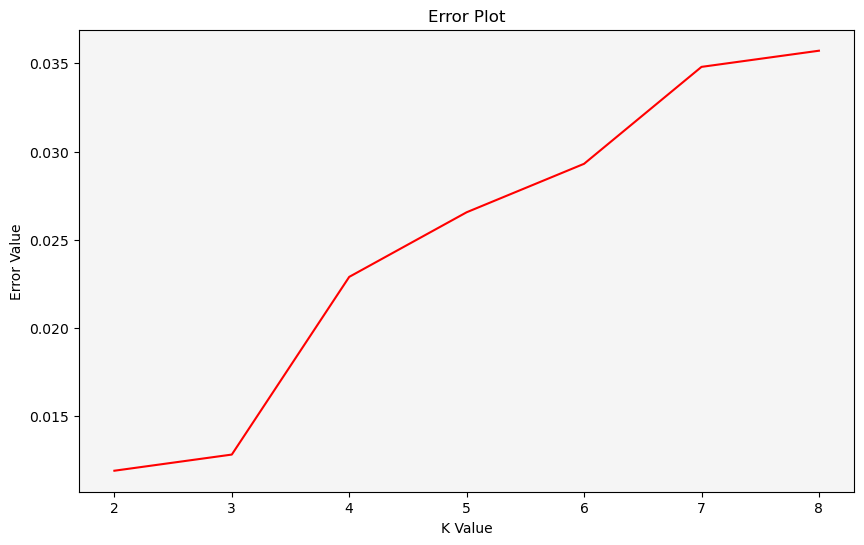

In [408]:
from sklearn import neighbors
error_rate=[]
for i in range(2,9):
    cls_yellow=neighbors.KNeighborsClassifier(n_neighbors=i)
    cls_yellow.fit(X_train12,y_train12)
    predictions=cls_yellow.predict(X_test12)
    error_rate.append(np.mean(predictions!=y_test12))
plt.figure(figsize=(10,6))
plt.plot(range(2,9),error_rate,color="red")
plt.title("Error Plot")
plt.xlabel("K Value")
plt.ylabel("Error Value")
plt.gca().set_facecolor("whitesmoke")
plt.show()

In [409]:
cls_attend=neighbors.KNeighborsClassifier(n_neighbors=3)
model=cls_attend.fit(X_train12,y_train12)
predict=model.predict(X_test12)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [410]:
print("accuracy_score:",accuracy_score(y_test12,predict))
print("precision_score:",precision_score(y_test12,predict,average="micro"))
print("f1_score:",f1_score(y_test12,predict,average="micro"))
print("recall_score:",recall_score(y_test12,predict,average="micro"))

accuracy_score: 0.9871794871794872
precision_score: 0.9871794871794872
f1_score: 0.9871794871794872
recall_score: 0.9871794871794872


In [411]:
# CROSS VALIDATION SCORE:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(cls_yellow, X_train12, y_train12, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-validation scores: [0.94705882 0.95490196 0.93320236 0.95284872 0.95088409]
Mean CV Score: 0.9477791902615664


## INTERPRETATION:

-- Accuracy: Overall correctness. Good general indicator, but can be misleading with imbalanced data.

--Precision: How many of the positive predictions were correct? Important when false positives are costly.

-- Recall: How many of the actual positives were correctly predicted? Important when false negatives are costly.

-- F1-score: Balances precision and recall. Useful when both are important.


1. High Accuracy (98.7%)

My model correctly predicts yellow cards in almost all cases. So Very few misclassifications in the dataset.

2. High Precision (98.7%)

When the model predicts a yellow card, it is correct 98.7% of the time. False positives are minimal, meaning the model is not overpredicting yellow cards.

3. High Recall (98.7%)

The model captures 98.7% of actual yellow card cases. False negatives are very low, meaning it rarely misses actual yellow card instances

5. High F1 Score (98.7%)

Since F1 is the harmonic mean of precision & recall, it confirms a good balance between false positives and false negatives.




# SPRINT 8:

### DESCRIPTIVE ANALYSIS:

# (i) REFEREE ANALYSIS:

### 1: Which referees issue the most yellow cards overall?

In [417]:
referee_yellow = merged_df.groupby('referee')['yellow_cards'].sum()
referee_yellow = pd.DataFrame(referee_yellow)
referee_yellow = referee_yellow.sort_values(by='yellow_cards', ascending=False)
referee_yellow_10 = referee_yellow.head(10)
referee_yellow_10

,yellow_cards
referee,
Felix Zwayer,64
Tobias Stieler,53
Guido Winkmann,45
Mikkel Redder,38
Manuel Graofe,30
Daniel Siebert,28
Dr. Felix Brych,26
Deniz Aytekin,25
Christian Dingert,20


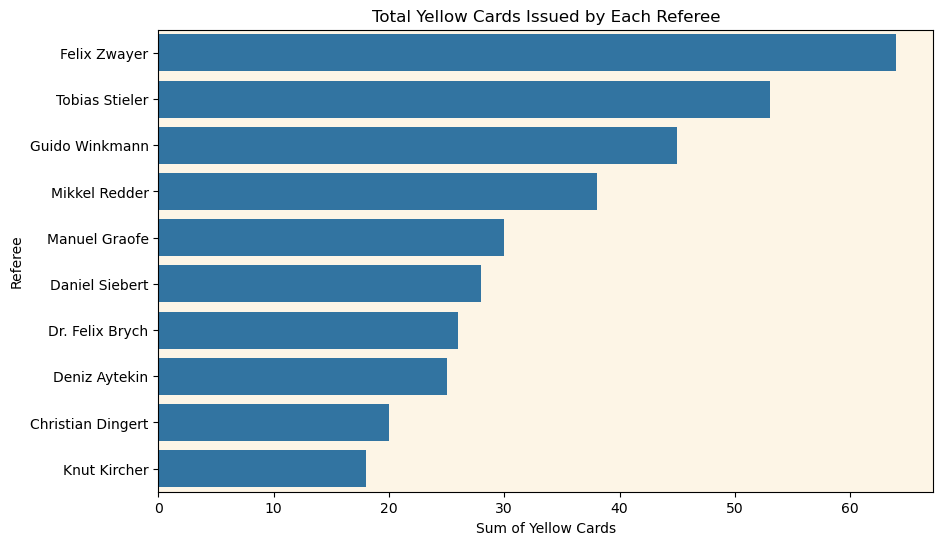

In [418]:
plt.figure(figsize=(10, 6))
sns.barplot(data=referee_yellow_10, x='yellow_cards', y='referee', orient='h')
plt.gca().set_facecolor('oldlace')
plt.title("Total Yellow Cards Issued by Each Referee")
plt.xlabel("Sum of Yellow Cards")
plt.ylabel("Referee")
plt.show()

## INTERPRETATION:

HERE, I HAVE CALCULATED WHICH REFEREE HAS GIVEN MOST YELLOW CARDS AND THEIR NAME, I TOOK TOP 10 AND ORDERED THEM BASED ON TOTALL NUMBER OF YELLOW CARDS IN DESCENDING ORDER AND VISUALIZED.

### 2. Which Referees Officiate the Highest Number of Matches?

In [421]:
df = merged_df

In [422]:
referee_matches = df.groupby('referee')['game_id_x'].nunique().reset_index()
referee_matches = referee_matches.rename(columns={'game_id_x': 'match_count'})
referee_matches = referee_matches.sort_values(by='match_count', ascending=False)
referee_matches_10 = referee_matches.head(10)
referee_matches_10

,referee,match_count
42,Felix Zwayer,15
76,Manuel Graofe,14
36,Dr. Felix Brych,12
124,Tobias Stieler,12
27,Daniel Siebert,12
48,Guido Winkmann,9
77,Marco Fritz,8
112,Sascha Stegemann,7
32,Deniz Aytekin,7
22,Christian Dingert,7


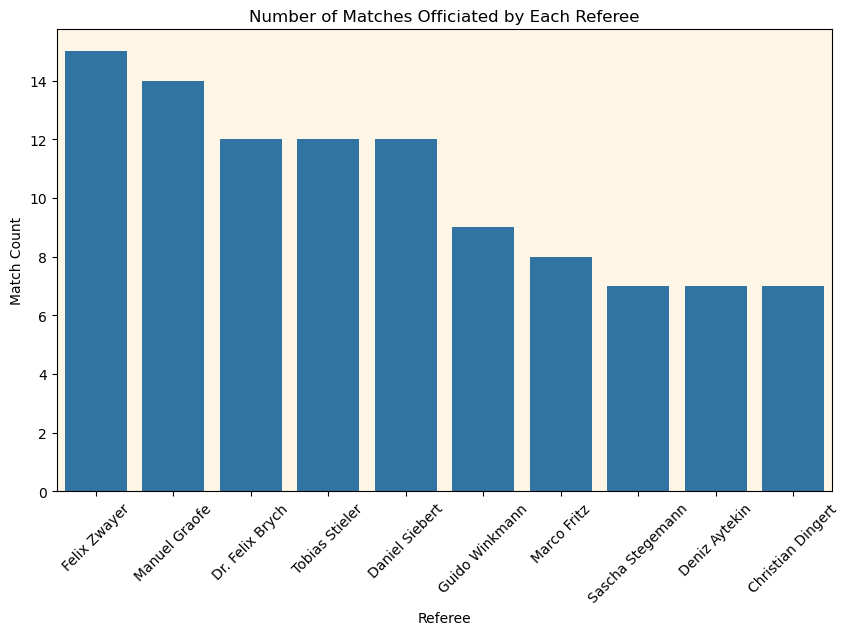

In [423]:
plt.figure(figsize=(10, 6))
sns.barplot(data=referee_matches_10, x='referee', y='match_count')
plt.gca().set_facecolor('oldlace')
plt.xticks(rotation=45)
plt.title("Number of Matches Officiated by Each Referee")
plt.xlabel("Referee")
plt.ylabel("Match Count")
plt.show()


## INTERPRETATION:

I HAVE CALUCLATED WHICH REEREE ATTEND MOST NUMBER OF MATCHES SO I FIRST GROUPED THEM BASED ON REFEREE AND TOOK UNIQUE GAME_ID AND RENAMED THAT GAME_ID COLUMN TO MATCH_COUNT AND SORTED THEM BASED ON MATCH COUNT AND VISUALIZED IN BARCHART.

# (ii) Substitution Patterns

### 1. At which minutes do most substitutions occur?

In [427]:
# Filter rows where a substitution occurred (player_in_id not null)
subs_df = df[df['player_in_id'].notnull()]
subs_df.head(2)

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,age
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35


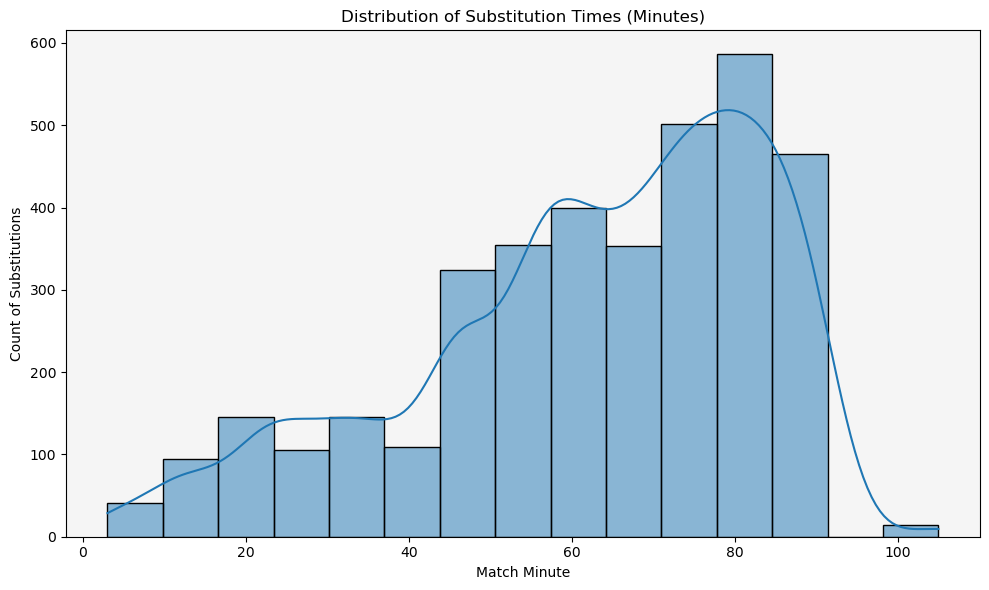

In [428]:
plt.figure(figsize=(10, 6))
sns.histplot(subs_df['minute'], bins=15, kde=True)
plt.gca().set_facecolor('whitesmoke')
plt.title("Distribution of Substitution Times (Minutes)")
plt.xlabel("Match Minute")
plt.ylabel("Count of Substitutions")
plt.tight_layout()
plt.show()

## INTERPRETATION:

Most substitutions occur between the 60th and 90th minute, with a peak around the 70-80 minute mark. This aligns with the typical time frame for tactical changes and managing player fatigue towards the end of a football match.

### 2. How do substitution counts vary by round?

In [431]:
subs_df = df[df['player_in_id'].notnull()]
subs_by_round = subs_df.groupby('round')['player_in_id'].count().reset_index()
subs_by_round = subs_by_round.rename(columns={'player_in_id': 'num_subs'})
subs_by_round_20 = subs_by_round.head(20)
subs_by_round_20

,round,num_subs
0,1. Matchday,189
1,10. Matchday,77
2,11. Matchday,60
3,12. Matchday,46
4,13. Matchday,40
5,14. Matchday,62
6,15. Matchday,118
7,16. Matchday,117
8,17. Matchday,133
9,18. Matchday,95


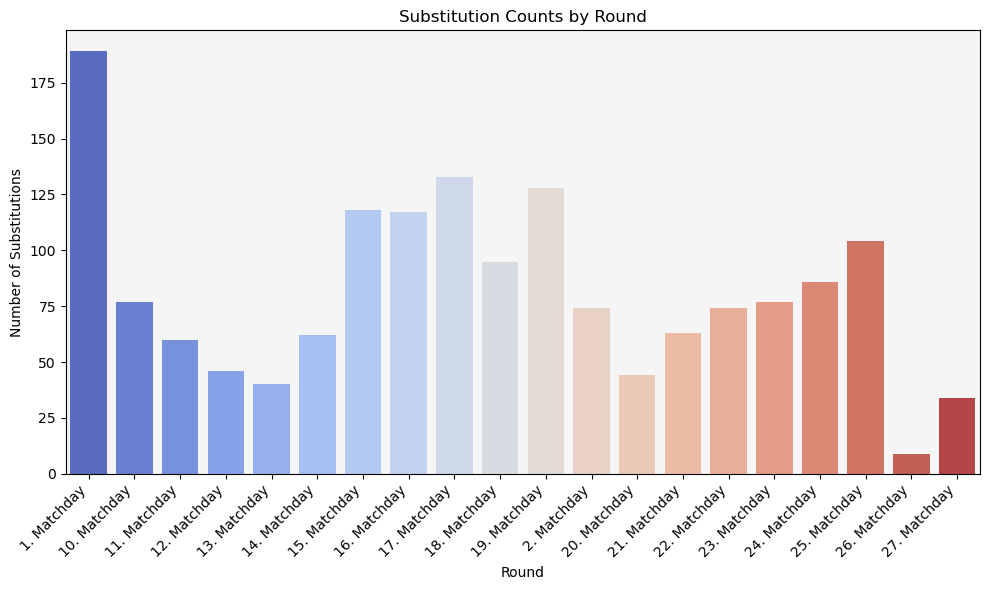

In [432]:
plt.figure(figsize=(10, 6))
sns.barplot(data=subs_by_round_20, x='round', y='num_subs', palette='coolwarm')
plt.gca().set_facecolor('whitesmoke')
plt.xticks(rotation=45, ha='right')
plt.title("Substitution Counts by Round")
plt.xlabel("Round")
plt.ylabel("Number of Substitutions")
plt.tight_layout()
plt.show()

## INTERPRETATION:

The first matchday shows a significantly higher number of substitutions compared to all other rounds.  While there's variation in substitutions across other matchdays, none approach the volume seen on the opening day.

# (iii) Event Analysis

### 1: What is the distribution of event types across the dataset?

In [436]:
events_count = df.groupby('type_x')['game_event_id'].count().reset_index()
events_count = events_count.rename(columns={'game_event_id': 'event_frequency'})
events_count

,type_x,event_frequency
0,Cards,92
1,Goals,1250
2,Substitutions,2295


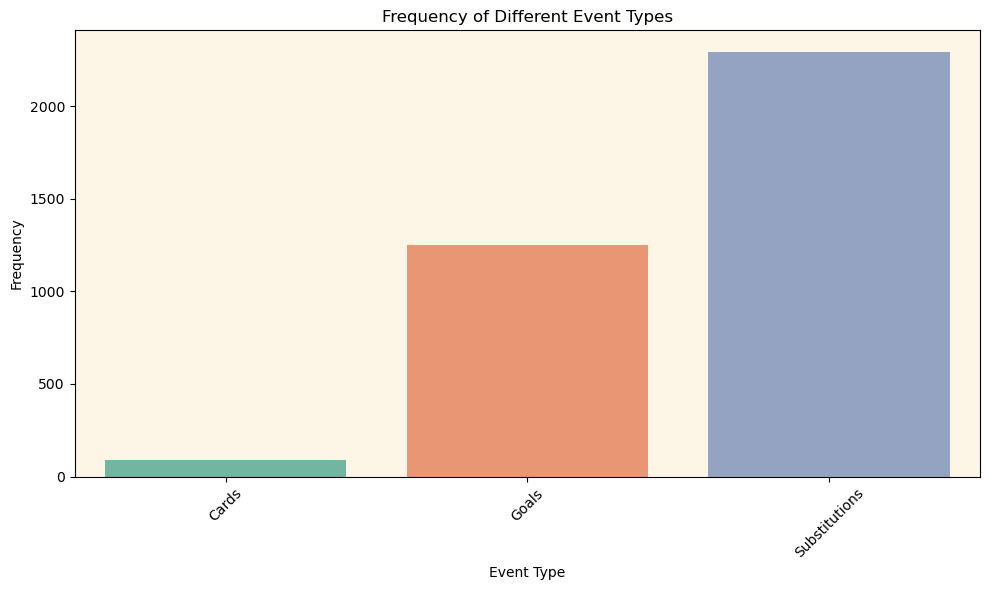

In [437]:
plt.figure(figsize=(10, 6))
sns.barplot(data=events_count, x='type_x', y='event_frequency', palette='Set2')
plt.gca().set_facecolor('oldlace')
plt.xticks(rotation=45)
plt.title("Frequency of Different Event Types")
plt.xlabel("Event Type")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## INTERPRETATION:

HERE, I HAVE CALCULATED THE DISTRIBUTION OF EVENT TYPE OCCURS SO I GROUPED THE EVENTS IN TYPE_X AND COUNTED BASED ON THEIR EVENT ID AND VISUALIZED USING BAR CHART.

### 2: How do events vary by match minute?

In [440]:
events_minute = df.groupby(['minute', 'type_x'])['game_event_id'].count()
events_minute = pd.DataFrame(events_minute)
events_minute = events_minute.rename(columns={'game_event_id': 'event_count'})
events_minute

event_count
minute type_x                    
3      Goals                   12
5      Goals                   14
6      Goals                   14
7      Goals                    1
10     Substitutions            6
...                           ...
89     Substitutions           16
90     Cards                   12
       Goals                   65
       Substitutions          115
105    Goals                   14

[131 rows x 1 columns]

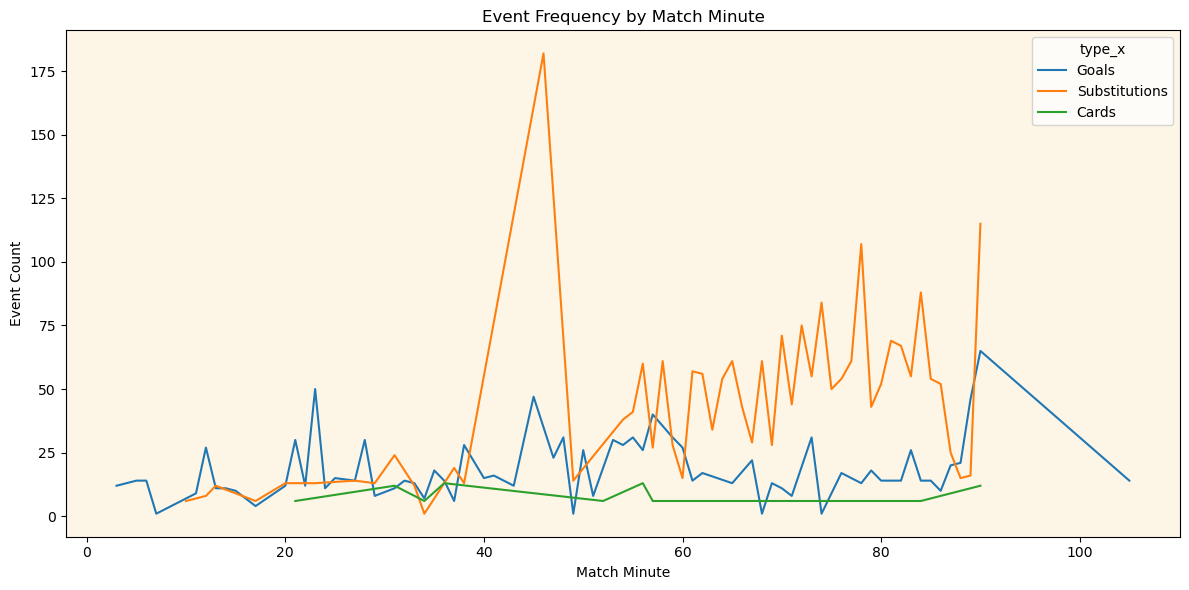

In [441]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=events_minute, x='minute', y='event_count', hue='type_x')
plt.gca().set_facecolor('oldlace')
plt.title("Event Frequency by Match Minute")
plt.xlabel("Match Minute")
plt.ylabel("Event Count")
plt.tight_layout()
plt.show()

## INTERPRETATION:

Goals occur more frequently towards the end of the match, particularly after minute 90, suggesting added time or increased attacking pressure. Substitutions steadily increase throughout the second half, peaking in the final minutes as teams make tactical changes or manage fatigue.

# (iv) Competition Analysis:

### 1. Which competition has the highest average goals per match?

In [445]:
df['total_goals'] = df['home_club_goals'] + df['away_club_goals']
comp_goals = df.groupby('competition_id_x')['total_goals'].mean().reset_index()
comp_goals = comp_goals.sort_values('total_goals', ascending=False)
comp_goals

,competition_id_x,total_goals
17,USC,13.000000
3,DFL,13.000000
14,NLP,6.875000
7,ELQ,5.000000
5,DKP,4.885246
2,DFB,4.574879
10,FRCH,4.000000
13,NL1,3.889908
11,GB1,3.592068
12,L1,3.445956


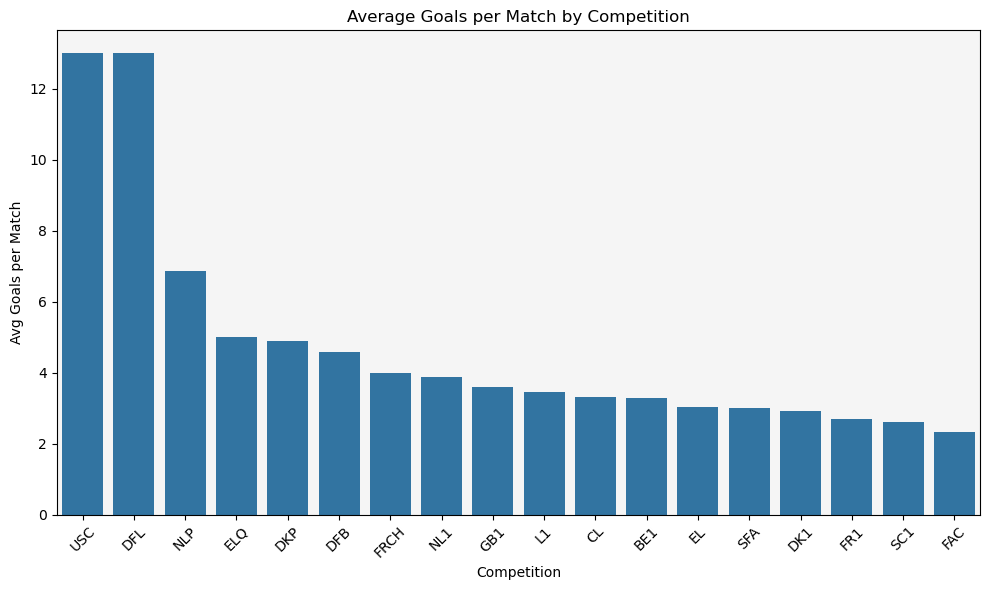

In [446]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comp_goals, x='competition_id_x', y='total_goals')
plt.gca().set_facecolor('whitesmoke')
plt.title("Average Goals per Match by Competition")
plt.xlabel("Competition")
plt.ylabel("Avg Goals per Match")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## INTERPRETATION:

The USC and DFL competitions exhibit significantly higher average goals per match compared to all other competitions.  While there's a general downward trend in average goals across the remaining competitions, the differences between them are less pronounced.

### 2. Which competition has the highest average attendance?

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                3637 non-null   object        
 1   game_id_x                    3637 non-null   int64         
 2   player_id                    3637 non-null   int64         
 3   competition_id_x             3637 non-null   object        
 4   yellow_cards                 3637 non-null   int64         
 5   red_cards                    3637 non-null   int64         
 6   goals                        3637 non-null   int64         
 7   assists                      3637 non-null   int64         
 8   minutes_played               3637 non-null   int64         
 9   season                       3637 non-null   int64         
 10  round                        3637 non-null   object        
 11  home_club_goals              3637 non-null 

In [450]:
comp_attendance = df.groupby('competition_id_x')['attendance'].mean().reset_index()
comp_attendance = comp_attendance.sort_values('attendance', ascending=False)
comp_attendance

,competition_id_x,attendance
3,DFL,81360.000000
1,CL,50920.225124
12,L1,50127.357606
10,FRCH,41237.000000
17,USC,38434.000000
8,FAC,32421.794748
16,SFA,29941.000000
11,GB1,29652.796067
2,DFB,28821.342995
6,EL,28374.096203


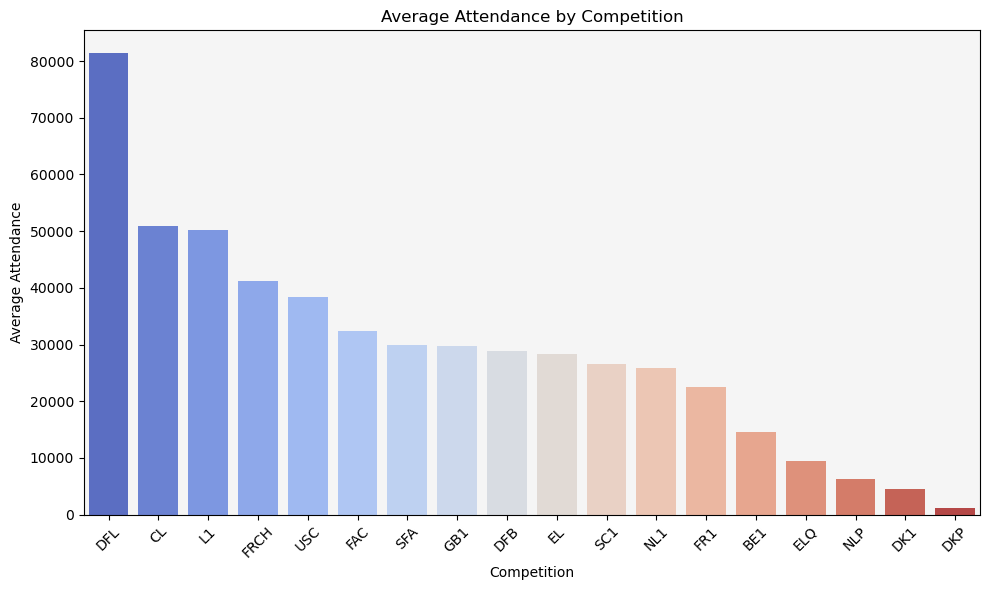

In [451]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comp_attendance, x='competition_id_x', y='attendance', palette='coolwarm')
plt.gca().set_facecolor('whitesmoke')
plt.title("Average Attendance by Competition")
plt.xlabel("Competition")
plt.ylabel("Average Attendance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## INTERPRETATION:

DFL boasts a significantly higher average attendance than any other competition, indicating its strong popularity.  While CL and L1 also have relatively high average attendance, there's a steep drop-off, and the remaining competitions show a wide range of lower average attendance figures.

# (v) Player Attributes and Demographics:

### 1. What is the distribution of foot preference among players?

In [455]:
foot_counts = df['foot'].value_counts().reset_index()
foot_counts.columns = ['foot_preference', 'count']
foot_counts

,foot_preference,count
0,right,3037
1,left,565
2,both,35


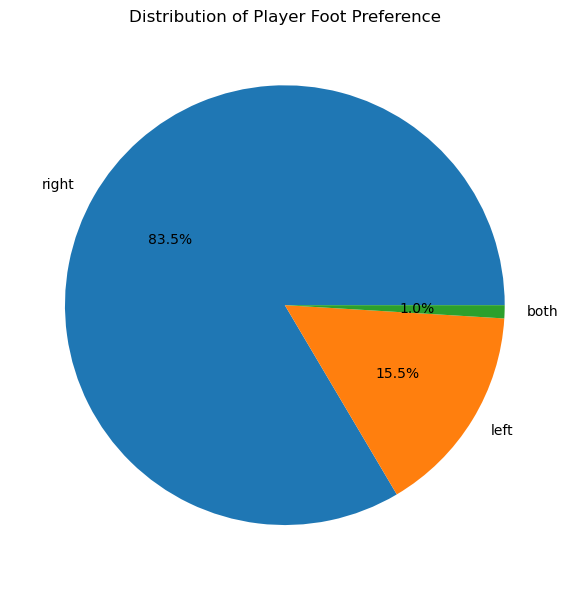

In [456]:
plt.figure(figsize=(10, 6))
plt.pie(foot_counts['count'], labels=foot_counts['foot_preference'], autopct='%1.1f%%')
plt.title("Distribution of Player Foot Preference")
plt.tight_layout()
plt.show()

## INTERPRETATION:

The overwhelming majority of players in the dataset prefer their right foot, representing 83.5% of the total. Left-footed players make up the second largest group at 15.5%, while players who are comfortable with both feet are a small minority at just 1%.

### 2. How does player age distribute across the dataset?

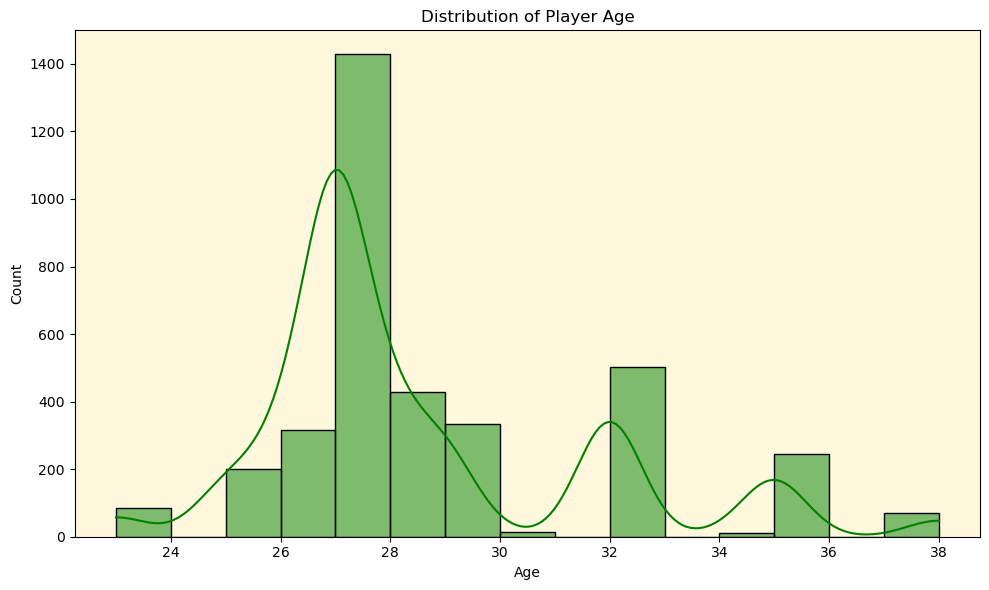

In [459]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=15, kde=True, color='green')
plt.gca().set_facecolor('cornsilk')
plt.title("Distribution of Player Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## INTERPRETATION:

Most players are in their late 20s, with the biggest group around 28 years old.  There are fewer players as age increases, and also a smaller number of very young player.

### 3. What is the relationship between player height and market value?

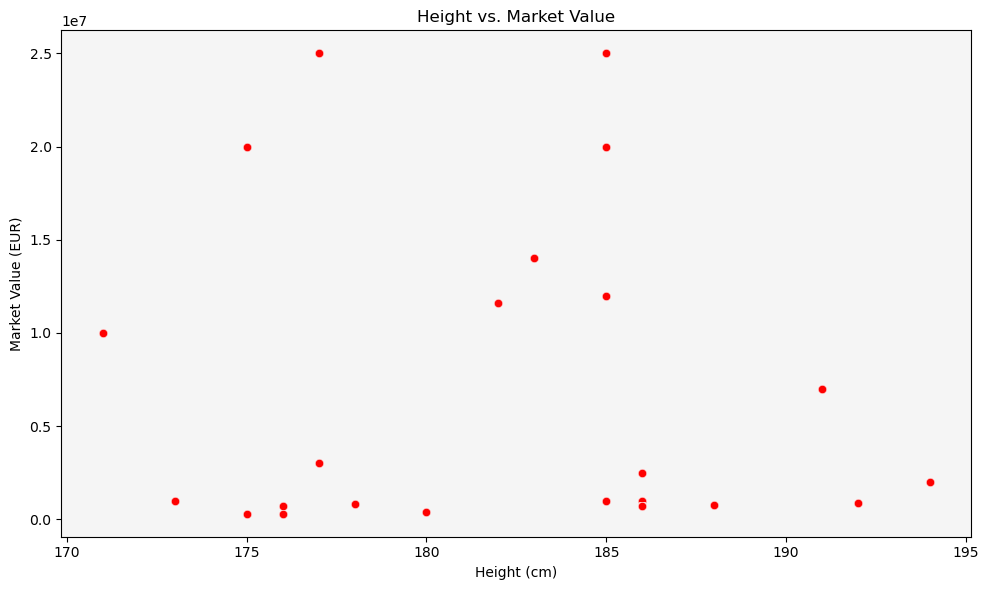

In [462]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='height_in_cm', y='market_value_in_eur', alpha=0.6, color='red')
plt.gca().set_facecolor('whitesmoke')
plt.title("Height vs. Market Value")
plt.xlabel("Height (cm)")
plt.ylabel("Market Value (EUR)")
plt.tight_layout()
plt.show()

## INTERPRETATION:
There is clear linear relationship between height and market value. While some taller players have higher market values, many do not, and similarly, some shorter players also have relatively high market values.

# (vi) Contract Management

### 1. What is the distribution of contract expiration dates?

In [466]:
df['contract_year'] = df['contract_expiration_date'].dt.year
contract_counts = df.groupby('contract_year')['player_id'].nunique().reset_index()
contract_counts.columns = ['contract_year', 'player_count']
contract_counts

,contract_year,player_count
0,2024,9
1,2025,5
2,2026,3
3,2027,5
4,2028,2


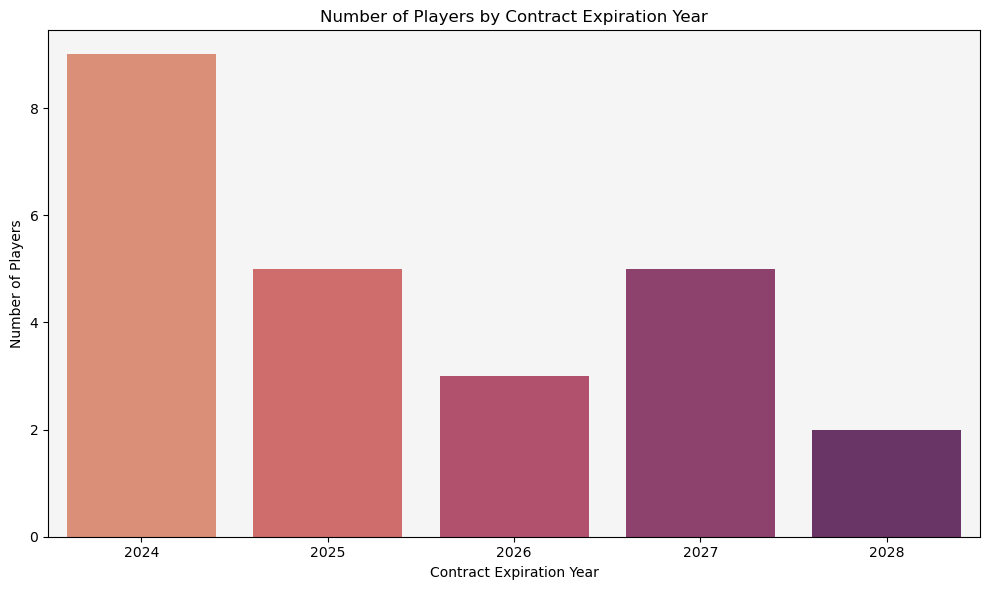

In [467]:
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('whitesmoke')
sns.barplot(data=contract_counts, x='contract_year', y='player_count', palette='flare')
plt.title("Number of Players by Contract Expiration Year")
plt.xlabel("Contract Expiration Year")
plt.ylabel("Number of Players")
plt.tight_layout()
plt.show()

## INTERPRETATION:

The year 2024 has the highest number of player contracts expiring, with 9 players becoming free agents.  There's a general decline in expiring contracts in the following years, with a small peak in 2027. This suggests a potential need for contract negotiations or player acquisitions in the near future, particularly in 2024.

### 2. How does contract expiry relate to market value?

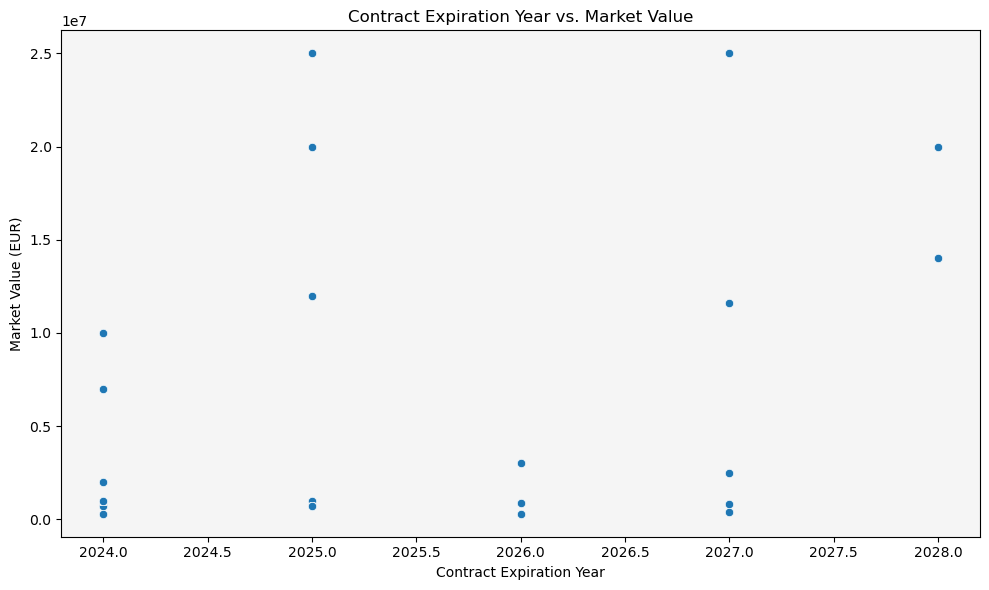

In [470]:
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('whitesmoke')
sns.scatterplot(data=df, x='contract_year', y='market_value_in_eur')
plt.title("Contract Expiration Year vs. Market Value")
plt.xlabel("Contract Expiration Year")
plt.ylabel("Market Value (EUR)")
plt.tight_layout()
plt.show()

## INTERPRETATION:

This scatter plot doesn't reveal a strong correlation between contract expiration year and market value.  While some players with expiring contracts in 2024 have high market values, there are also players with later contract expirations who possess similar or even higher values.  The distribution suggests other factors likely play a more significant role in determining market value.

# HYPOTHESIS TESTING (T-TEST) - TWO TAILED:

### 1. If there is a significant difference in the number of goals scored by the players of different prefereed foot? could be left or right select 35 random samples of number of goals scored by the players from the given data. use 5% significant level for the test

- H0: There is no significant difference in the number of goals scored by the players of different preferred foot.

- H1: There is a significant difference in the number of goals scored by the players of different prefereed foot.

In [475]:
foot_l=merged_df[merged_df['foot']=='left']
foot_l

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,age,total_goals,contract_year
72,2321034_124732,2321034,124732,L1,0,0,1,0,90,2013,...,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON,32,7,2024
73,2321034_124732,2321034,124732,L1,0,0,1,0,90,2013,...,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON,32,7,2024
74,2321034_124732,2321034,124732,L1,0,0,1,0,90,2013,...,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON,32,7,2024
75,2321034_124732,2321034,124732,L1,0,0,1,0,90,2013,...,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON,32,7,2024
76,2321034_124732,2321034,124732,L1,0,0,1,0,90,2013,...,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON,32,7,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,3203733_124732,3203733,124732,L1,0,0,0,0,74,2019,...,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON,32,4,2024
3382,3203733_124732,3203733,124732,L1,0,0,0,0,74,2019,...,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON,32,4,2024
3383,3203733_124732,3203733,124732,L1,0,0,0,0,74,2019,...,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON,32,4,2024
3384,3203733_124732,3203733,124732,L1,0,0,0,0,74,2019,...,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON,32,4,2024


In [476]:
goals_foot=foot_l[['goals']]
p1_mean=st.mean(goals_foot['goals'])
p1_mean

0.35221238938053095

In [477]:
p1_std=st.stdev(goals_foot["goals"])
p1_std

0.47808300436858164

In [478]:
p1_var=st.variance(goals_foot["goals"])
p1_var

0.22856335906608924

In [479]:
sample_df=goals_foot.sample(n=30,replace=True,random_state=1)
sample_df

,goals
121,0
534,0
186,0
272,0
257,0
2380,0
1061,0
656,1
312,1
651,1


In [480]:
s1_mean=st.mean(sample_df["goals"])
s1_mean

0.4666666666666667

In [481]:
s1_std=st.stdev(sample_df['goals'])
s1_std

0.5074162634049248

In [482]:
s1_var=st.variance(sample_df["goals"])
s1_var

0.2574712643678161

In [483]:
foot_r=merged_df[merged_df["foot"]=="right"]
foot_r

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,age,total_goals,contract_year
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35,3,2025
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35,3,2025
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35,3,2025
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35,3,2025
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35,3,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,5,2026
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,5,2026
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,5,2026
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29,5,2026


In [484]:
goals_r=foot_r[["goals"]]
goals_r

,goals
0,0
1,0
2,0
3,0
4,0
...,...
3632,1
3633,1
3634,1
3635,1


In [485]:
p2_mean=st.mean(goals_r["goals"])
p2_mean

0.5090549884754693

In [486]:
p2_std=st.stdev(goals_r["goals"])
print(p2_std)

0.6326120089173075


In [487]:
p2_var=st.variance(goals_r["goals"])
p2_var

0.4001979538263915

In [488]:
sample_df_r=goals_r.sample(n=30,replace=True,random_state=1)
sample_df_r

,goals
1470,1
468,0
1505,1
1301,0
3350,1
3495,1
1356,1
327,1
304,1
3397,0


In [489]:
s2_mean=st.mean(sample_df_r["goals"])
print('sample_mean:',s2_mean)
s2_std=st.stdev(sample_df_r["goals"])
print('sample_std:',s2_mean)
s2_var=st.variance(sample_df_r["goals"])
print('sample_variance:',s2_var)
n1=len(sample_df_r)
n2=len(sample_df_r)
dof=n1+n2-2
print("Degrees of Freedom:",dof)

sample_mean: 0.5
sample_std: 0.5
sample_variance: 0.25862068965517243
Degrees of Freedom: 58


In [490]:
x1=s1_mean
x2=s2_mean
p1=p1_mean
p2=p2_mean
v1=s1_var
v2=s2_var
alpha=0.5

In [491]:
signal=abs(x1-x2)
print('singnal:',signal)
noise=m.sqrt((v1*(n1-1+(v2*(n2-2)))*((1/n1+1/n2))))
print('noise:',noise)

singnal: 0.033333333333333326
noise: 0.7887168378012519


In [492]:
t_statistics=signal/noise
print("The t_statistics values are:",t_statistics)

The t_statistics values are: 0.042262738331108086


In [493]:
p_value=t.sf(abs(t_statistics),dof)
print("The p_values are:",p_value)

The p_values are: 0.4832172032326666


In [494]:
t_critical=norm.ppf(alpha/2,dof)
print("The t_critical values are:",t_critical)

The t_critical values are: 57.32551024980392


HYPOTHESIS:

-- Here p_value is less than alpha value that is 0.5 so, we have to reject the NULL HYPOTHESIS.

-- t_critical is greater than t_statistics so we reject NULL HYPOTHESIS.

So, There is a significant difference in the number of goals scored by the players of different preferred foot.


# K NEAREST NEIGHBOR CLUSTERING:

### 1. Can we identify group of players with similar pattern based on player's atrributes ( height in cm, minutes played) 

In [498]:
required_kmeans_data = df[["height_in_cm","minutes_played"]]
test_required_kmeans_data = test_df[["height_in_cm","minutes_played"]]
required_kmeans_last=pd.concat([required_kmeans_data,test_required_kmeans_data],axis=0)
required_kmeans_last

,height_in_cm,minutes_played
0,186.0,70
1,186.0,70
2,186.0,70
3,186.0,70
4,186.0,70
...,...,...
3634,176.0,77
3635,176.0,77
3636,176.0,77
0,177.0,58


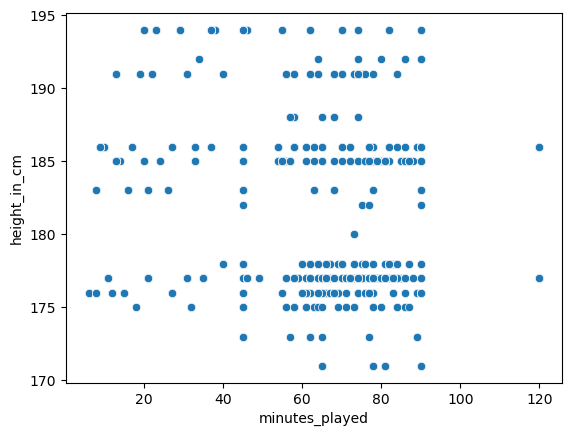

In [499]:
sns.scatterplot(data=merged_df,y='height_in_cm',x='minutes_played')
plt.show()

In [500]:
scale=StandardScaler()
scalded_df=scale.fit_transform(required_kmeans_last)
scalded_df=pd.DataFrame(scalded_df,columns=required_kmeans_last.columns)
scalded_df

,height_in_cm,minutes_played
0,0.680466,-0.000131
1,0.680466,-0.000131
2,0.680466,-0.000131
3,0.680466,-0.000131
4,0.680466,-0.000131
...,...,...
3634,-0.882407,0.333417
3635,-0.882407,0.333417
3636,-0.882407,0.333417
3637,-0.726120,-0.571927


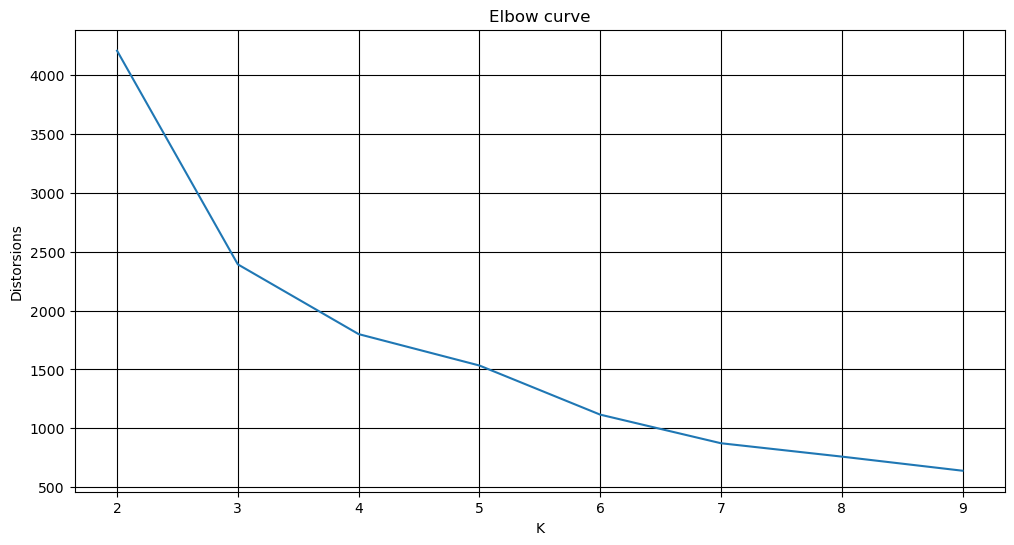

In [501]:
from sklearn.cluster import KMeans
Distorsions =[]
for k in range(2,10):
    KMeans_model=KMeans(n_clusters=k)
    KMeans_model.fit(scalded_df)
    Distorsions.append(KMeans_model.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(2,10),Distorsions)
plt.grid(True,c="black")
plt.xlabel("K")
plt.ylabel("Distorsions")
plt.title("Elbow curve")
plt.show()

## ELBOW CURVE:

The Elbow Curve (also known as the scree plot) is a visual tool used to determine the optimal number of clusters (k) for K-Means clustering.

X-axis (K): Represents the number of clusters.


Y-axis (Distortion/Inertia): Represents the sum of squared distances between each point and the centroid of its assigned cluster. Lower values are better – indicating tighter clusters.

I got Elbow Curve suggests that k=3 is the optimal number of clusters for my data.

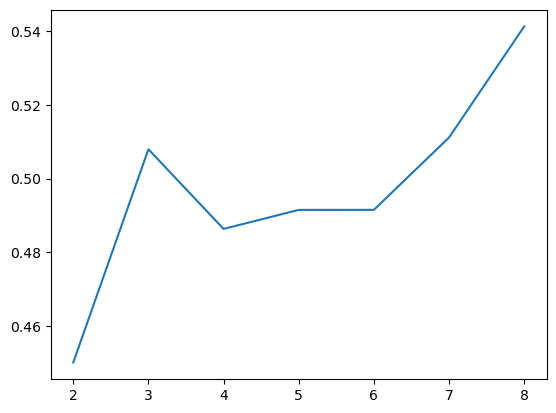

In [503]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_score_1=[]
for i in range(2,9):
    silhouette_score_1.append(silhouette_score(scalded_df,KMeans(n_clusters=i,random_state=10).fit_predict(scalded_df)))
plt.plot(range(2,9),silhouette_score_1)
plt.show()

## SILHOUETTE SCORE:

The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters.
Values range from -1 to 1:
    
Closer to 1: Indicates the data point is well-clustered.
    
Closer to 0: Indicates weak clustering or overlapping clusters.

Closer to -1: Indicates the data point might be better off in a neighboring cluster.

The Silhouette Score suggests that 3 is the best number of clusters for my data.

In [505]:
KMean_model=KMeans(n_clusters=3,random_state=10)
KMean_model.fit(scalded_df)
KMean_centroid=KMean_model.cluster_centers_
print(KMean_centroid)

labels=KMean_model.labels_
labels

[[-0.78612405  0.39759189]
 [ 1.08133349  0.45152414]
 [ 0.33502171 -1.59311691]]


array([1, 1, 1, ..., 0, 0, 0])

for n_clusters = 2 the avg silhouette_score is = 0.5727563693364385
for n_clusters = 3 the avg silhouette_score is = 0.49658744970451996
for n_clusters = 4 the avg silhouette_score is = 0.41034657780361206
for n_clusters = 5 the avg silhouette_score is = 0.43360631912330544
for n_clusters = 6 the avg silhouette_score is = 0.4425903323363047
for n_clusters = 7 the avg silhouette_score is = 0.4551962529226175
for n_clusters = 8 the avg silhouette_score is = 0.45487734255872475
for n_clusters = 9 the avg silhouette_score is = 0.4867811880165749
for n_clusters = 10 the avg silhouette_score is = 0.5137801207591938


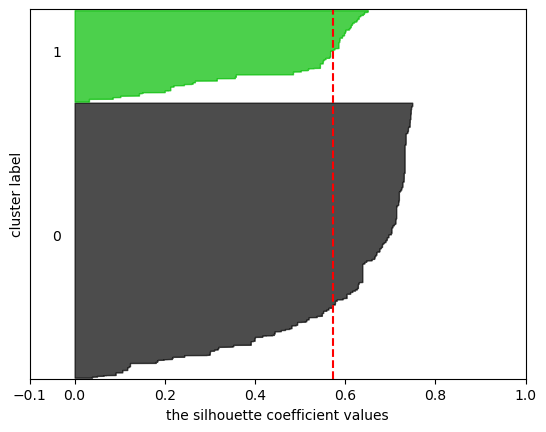

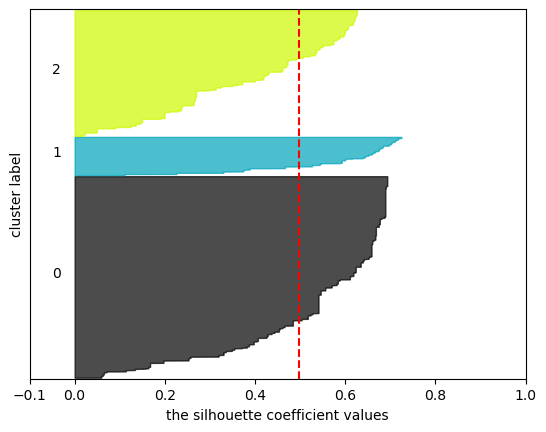

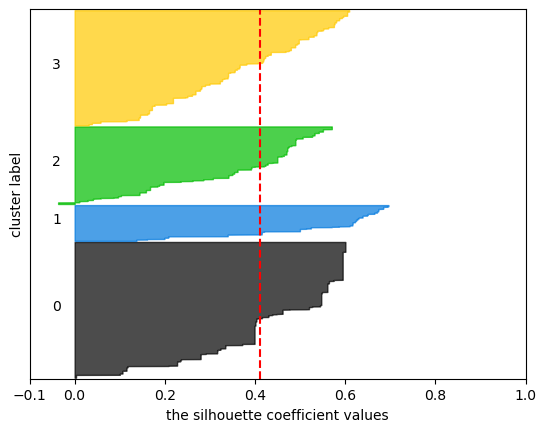

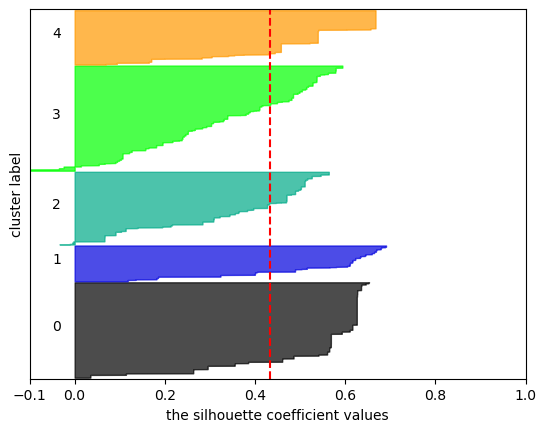

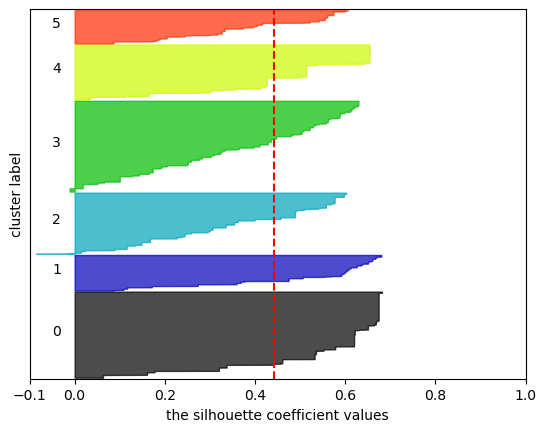

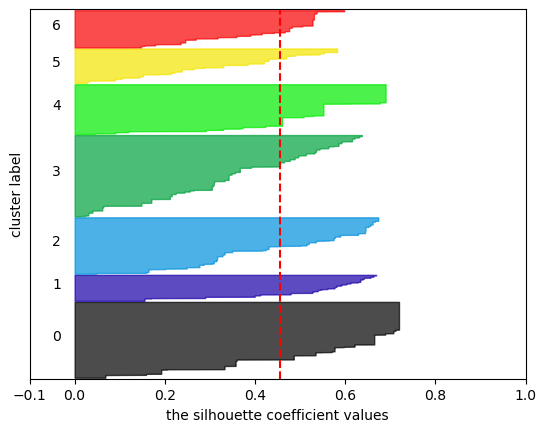

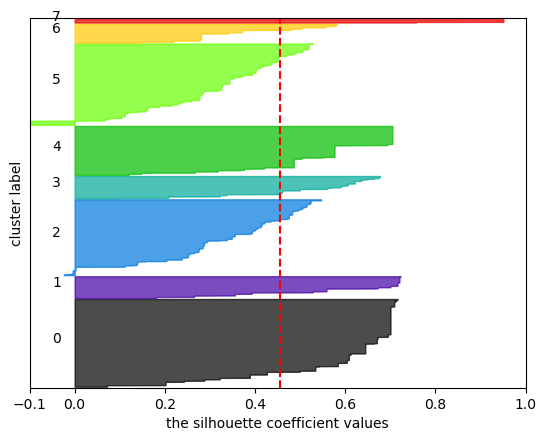

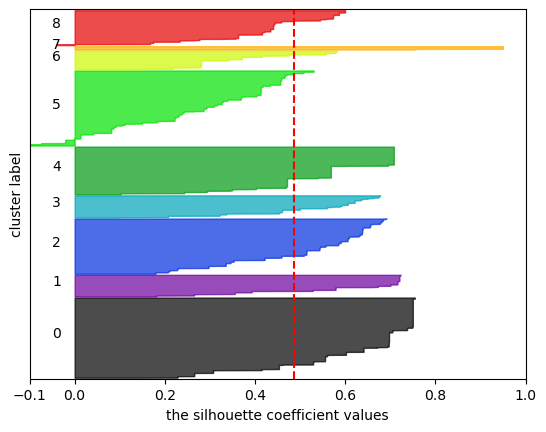

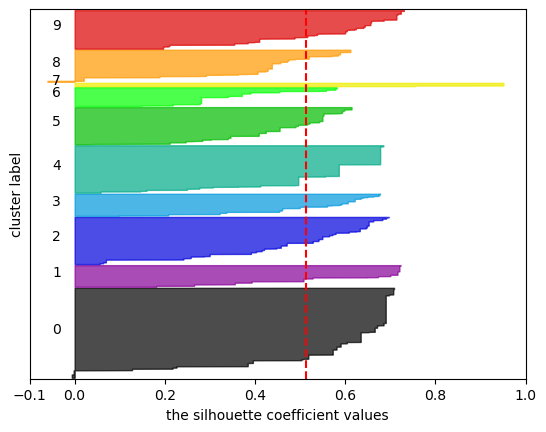

In [506]:
X = required_kmeans_last.values 
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    figure,ax1 = plt.subplots(1,1) 
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X) + (n_clusters + 1)* 10])
    cluster = KMeans(n_clusters = n_clusters,random_state=10)
    cluster_labels = cluster.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels)
    print('for n_clusters =',n_clusters,'the avg silhouette_score is =',silhouette_avg)

    sample_silhouette_values = silhouette_samples(X,cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values = np.sort(ith_cluster_silhouette_values) 

        size_cluster_i =  ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
       
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor = color,edgecolor = color,alpha = 0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
    
        y_lower = y_upper + 10
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')

    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
plt.show()

In [507]:
from sklearn.metrics import calinski_harabasz_score
calinski_score=calinski_harabasz_score(scalded_df,labels)
print("The Calinski Harbaz Score is:",calinski_score)

The Calinski Harbaz Score is: 3710.4417213258785


## CALINSKI HARBAZ SCORE:

Calinski-Harabasz Score (CH):

-- Measures the ratio of between-cluster dispersion to within-cluster dispersion.

-- Higher is better: A higher CH score indicates better-defined clusters.

-- My value (2292.40): Suggests relatively good cluster separation.

In [509]:
from sklearn.metrics import davies_bouldin_score
davies_score=davies_bouldin_score(scalded_df,labels)
print("The Davies Bouldin Score is:",davies_score)

The Davies Bouldin Score is: 0.8083793456400291


## DAVIES BOULDIN SCORE:

-- Measures the average similarity between each cluster and its most similar cluster.

-- Lower is better: A lower DB index indicates better separation between clusters.

## INTERPRETATION:

To evaluate my K-Means clustering, I used the Calinski-Harabasz (CH) score and the Davies-Bouldin (DB) index. The CH score measures cluster separation, with higher values being better, and I got a score of 3710.44. The DB index measures cluster similarity, with lower values being better, and I got a score of 0.808. While these values give an indication of cluster quality for k=3, it's essential to compare these scores with results from different numbers of clusters